# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

num_data1 = data1.shape[0]
num_data2 = data2.shape[0]

x1 = np.zeros(num_data1)
y1 = np.zeros(num_data1)
label1   = np.zeros(num_data1)

for i in range(num_data1):
    x1[i]  = data1[i,0]
    y1[i]  = data1[i,1]
    label1[i]    = data1[i,2]
    
    
x2 = np.zeros(num_data2)
y2 = np.zeros(num_data2)
label2   = np.zeros(num_data2)

for i in range(num_data2):
    x2[i]  = data2[i,0]
    y2[i]  = data2[i,1]
    label2[i]    = data2[i,2]
    
xy_data1 = np.vstack((x1, y1)).T
xy_data2 = np.vstack((x2, y2)).T

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

## define the feature function for each data to obtain the best accuracy

In [3]:
def feature_function1(x, y):     
    feature = np.array([1, x, y, x*x, x*y, y*y], dtype = object)
    return feature

In [4]:
def feature_function2(x, y):     
    feature = np.array([1, x, y, x*x, x*y, x*x*x], dtype = object)
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [5]:
def regression_function(theta, feature):
    value = np.matmul(np.transpose(theta), feature)
    return value

## define sigmoid function with input $x$

In [6]:
def logistic_function(x):
#     for _ in range(len(x)) :
    z = 1/(1+np.exp(-x))
    return z

## define loss function with feature and label based on the logistic regression

In [7]:
def compute_loss_feature(theta, feature, label):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    loss = (-label * np.log(h) - (1 - label) * np.log(1 - h)).mean()
    return loss

## define gradient vector for the model parameters $\theta$

In [8]:
def compute_gradient_feature(theta, feature, label):
    z = regression_function(theta, feature)
    h = logistic_function(z)
    num_data = feature[1].shape[0]
    one = np.ones(num_data)
    X = np.column_stack([one, feature[1], feature[2], feature[3], feature[4], feature[5]])
    gradient = np.dot(X.T, (h - label)) / feature[1].shape[0]
    return gradient

## compute the accuracy

In [9]:
def compute_accuracy(theta, feature, label):
    num_data = feature[1].shape[0]
    correctNum = 0
    f = regression_function(theta, feature)
    for i in range(0, num_data)  :
        if f[i]>=0 :
            ans = 1
        else :
            ans = 0
        if ans == label[i] :
            correctNum += 1
    accuracy = correctNum / num_data
    return accuracy

## gradient descent for the model parameters $\theta$

In [10]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate
theta1           = np.array((0, 0, 0, 0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta2           = np.array((0, 0, 0, 0, 0, 0))
theta1_iteration = np.zeros((num_iteration, theta1.size))
loss1_iteration  = np.zeros(num_iteration)
theta2_iteration = np.zeros((num_iteration, theta2.size))
loss2_iteration  = np.zeros(num_iteration)

In [11]:
for i in range(num_iteration):
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature_function1(x1, y1), label1)
    loss1 = compute_loss_feature(theta1, feature_function1(x1, y1), label1)
    theta1_iteration[i] = theta1
    loss1_iteration[i] = loss1
    print("iteration = %4d, loss = %5.5f" % (i, loss1))
print("###########################################################")
for i in range(num_iteration):
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature_function2(x2, y2), label2)
    loss2 = compute_loss_feature(theta2, feature_function2(x2, y2), label2)
    theta2_iteration[i] = theta2
    loss2_iteration[i] = loss2
    print("iteration = %4d, loss = %5.5f" % (i, loss2))
    
theta1_optimal = theta1
theta2_optimal = theta2

iteration =    0, loss = 0.72428
iteration =    1, loss = 0.57369
iteration =    2, loss = 0.54468
iteration =    3, loss = 0.52980
iteration =    4, loss = 0.51470
iteration =    5, loss = 0.50205
iteration =    6, loss = 0.48955
iteration =    7, loss = 0.47822
iteration =    8, loss = 0.46716
iteration =    9, loss = 0.45680
iteration =   10, loss = 0.44675
iteration =   11, loss = 0.43718
iteration =   12, loss = 0.42794
iteration =   13, loss = 0.41906
iteration =   14, loss = 0.41050
iteration =   15, loss = 0.40224
iteration =   16, loss = 0.39427
iteration =   17, loss = 0.38657
iteration =   18, loss = 0.37913
iteration =   19, loss = 0.37193
iteration =   20, loss = 0.36497
iteration =   21, loss = 0.35823
iteration =   22, loss = 0.35170
iteration =   23, loss = 0.34539
iteration =   24, loss = 0.33927
iteration =   25, loss = 0.33334
iteration =   26, loss = 0.32759
iteration =   27, loss = 0.32202
iteration =   28, loss = 0.31662
iteration =   29, loss = 0.31137
iteration 

iteration =  377, loss = 0.04922
iteration =  378, loss = 0.04912
iteration =  379, loss = 0.04901
iteration =  380, loss = 0.04891
iteration =  381, loss = 0.04881
iteration =  382, loss = 0.04871
iteration =  383, loss = 0.04861
iteration =  384, loss = 0.04851
iteration =  385, loss = 0.04842
iteration =  386, loss = 0.04832
iteration =  387, loss = 0.04822
iteration =  388, loss = 0.04812
iteration =  389, loss = 0.04803
iteration =  390, loss = 0.04793
iteration =  391, loss = 0.04783
iteration =  392, loss = 0.04774
iteration =  393, loss = 0.04764
iteration =  394, loss = 0.04755
iteration =  395, loss = 0.04746
iteration =  396, loss = 0.04736
iteration =  397, loss = 0.04727
iteration =  398, loss = 0.04718
iteration =  399, loss = 0.04708
iteration =  400, loss = 0.04699
iteration =  401, loss = 0.04690
iteration =  402, loss = 0.04681
iteration =  403, loss = 0.04672
iteration =  404, loss = 0.04663
iteration =  405, loss = 0.04654
iteration =  406, loss = 0.04645
iteration 

iteration =  759, loss = 0.02898
iteration =  760, loss = 0.02895
iteration =  761, loss = 0.02892
iteration =  762, loss = 0.02890
iteration =  763, loss = 0.02887
iteration =  764, loss = 0.02884
iteration =  765, loss = 0.02881
iteration =  766, loss = 0.02879
iteration =  767, loss = 0.02876
iteration =  768, loss = 0.02873
iteration =  769, loss = 0.02871
iteration =  770, loss = 0.02868
iteration =  771, loss = 0.02865
iteration =  772, loss = 0.02862
iteration =  773, loss = 0.02860
iteration =  774, loss = 0.02857
iteration =  775, loss = 0.02854
iteration =  776, loss = 0.02852
iteration =  777, loss = 0.02849
iteration =  778, loss = 0.02846
iteration =  779, loss = 0.02844
iteration =  780, loss = 0.02841
iteration =  781, loss = 0.02839
iteration =  782, loss = 0.02836
iteration =  783, loss = 0.02833
iteration =  784, loss = 0.02831
iteration =  785, loss = 0.02828
iteration =  786, loss = 0.02826
iteration =  787, loss = 0.02823
iteration =  788, loss = 0.02820
iteration 

iteration = 1152, loss = 0.02161
iteration = 1153, loss = 0.02160
iteration = 1154, loss = 0.02159
iteration = 1155, loss = 0.02158
iteration = 1156, loss = 0.02156
iteration = 1157, loss = 0.02155
iteration = 1158, loss = 0.02154
iteration = 1159, loss = 0.02153
iteration = 1160, loss = 0.02151
iteration = 1161, loss = 0.02150
iteration = 1162, loss = 0.02149
iteration = 1163, loss = 0.02148
iteration = 1164, loss = 0.02146
iteration = 1165, loss = 0.02145
iteration = 1166, loss = 0.02144
iteration = 1167, loss = 0.02143
iteration = 1168, loss = 0.02141
iteration = 1169, loss = 0.02140
iteration = 1170, loss = 0.02139
iteration = 1171, loss = 0.02138
iteration = 1172, loss = 0.02136
iteration = 1173, loss = 0.02135
iteration = 1174, loss = 0.02134
iteration = 1175, loss = 0.02133
iteration = 1176, loss = 0.02131
iteration = 1177, loss = 0.02130
iteration = 1178, loss = 0.02129
iteration = 1179, loss = 0.02128
iteration = 1180, loss = 0.02127
iteration = 1181, loss = 0.02125
iteration 

iteration = 1577, loss = 0.01758
iteration = 1578, loss = 0.01757
iteration = 1579, loss = 0.01756
iteration = 1580, loss = 0.01756
iteration = 1581, loss = 0.01755
iteration = 1582, loss = 0.01754
iteration = 1583, loss = 0.01753
iteration = 1584, loss = 0.01753
iteration = 1585, loss = 0.01752
iteration = 1586, loss = 0.01751
iteration = 1587, loss = 0.01751
iteration = 1588, loss = 0.01750
iteration = 1589, loss = 0.01749
iteration = 1590, loss = 0.01748
iteration = 1591, loss = 0.01748
iteration = 1592, loss = 0.01747
iteration = 1593, loss = 0.01746
iteration = 1594, loss = 0.01746
iteration = 1595, loss = 0.01745
iteration = 1596, loss = 0.01744
iteration = 1597, loss = 0.01744
iteration = 1598, loss = 0.01743
iteration = 1599, loss = 0.01742
iteration = 1600, loss = 0.01742
iteration = 1601, loss = 0.01741
iteration = 1602, loss = 0.01740
iteration = 1603, loss = 0.01739
iteration = 1604, loss = 0.01739
iteration = 1605, loss = 0.01738
iteration = 1606, loss = 0.01737
iteration 

iteration = 1985, loss = 0.01523
iteration = 1986, loss = 0.01523
iteration = 1987, loss = 0.01522
iteration = 1988, loss = 0.01522
iteration = 1989, loss = 0.01521
iteration = 1990, loss = 0.01521
iteration = 1991, loss = 0.01521
iteration = 1992, loss = 0.01520
iteration = 1993, loss = 0.01520
iteration = 1994, loss = 0.01519
iteration = 1995, loss = 0.01519
iteration = 1996, loss = 0.01518
iteration = 1997, loss = 0.01518
iteration = 1998, loss = 0.01517
iteration = 1999, loss = 0.01517
iteration = 2000, loss = 0.01516
iteration = 2001, loss = 0.01516
iteration = 2002, loss = 0.01516
iteration = 2003, loss = 0.01515
iteration = 2004, loss = 0.01515
iteration = 2005, loss = 0.01514
iteration = 2006, loss = 0.01514
iteration = 2007, loss = 0.01513
iteration = 2008, loss = 0.01513
iteration = 2009, loss = 0.01512
iteration = 2010, loss = 0.01512
iteration = 2011, loss = 0.01511
iteration = 2012, loss = 0.01511
iteration = 2013, loss = 0.01510
iteration = 2014, loss = 0.01510
iteration 

iteration = 2381, loss = 0.01368
iteration = 2382, loss = 0.01367
iteration = 2383, loss = 0.01367
iteration = 2384, loss = 0.01367
iteration = 2385, loss = 0.01366
iteration = 2386, loss = 0.01366
iteration = 2387, loss = 0.01366
iteration = 2388, loss = 0.01365
iteration = 2389, loss = 0.01365
iteration = 2390, loss = 0.01365
iteration = 2391, loss = 0.01364
iteration = 2392, loss = 0.01364
iteration = 2393, loss = 0.01364
iteration = 2394, loss = 0.01363
iteration = 2395, loss = 0.01363
iteration = 2396, loss = 0.01363
iteration = 2397, loss = 0.01362
iteration = 2398, loss = 0.01362
iteration = 2399, loss = 0.01362
iteration = 2400, loss = 0.01361
iteration = 2401, loss = 0.01361
iteration = 2402, loss = 0.01361
iteration = 2403, loss = 0.01360
iteration = 2404, loss = 0.01360
iteration = 2405, loss = 0.01360
iteration = 2406, loss = 0.01360
iteration = 2407, loss = 0.01359
iteration = 2408, loss = 0.01359
iteration = 2409, loss = 0.01359
iteration = 2410, loss = 0.01358
iteration 

iteration = 2805, loss = 0.01246
iteration = 2806, loss = 0.01246
iteration = 2807, loss = 0.01246
iteration = 2808, loss = 0.01246
iteration = 2809, loss = 0.01245
iteration = 2810, loss = 0.01245
iteration = 2811, loss = 0.01245
iteration = 2812, loss = 0.01245
iteration = 2813, loss = 0.01244
iteration = 2814, loss = 0.01244
iteration = 2815, loss = 0.01244
iteration = 2816, loss = 0.01244
iteration = 2817, loss = 0.01244
iteration = 2818, loss = 0.01243
iteration = 2819, loss = 0.01243
iteration = 2820, loss = 0.01243
iteration = 2821, loss = 0.01243
iteration = 2822, loss = 0.01242
iteration = 2823, loss = 0.01242
iteration = 2824, loss = 0.01242
iteration = 2825, loss = 0.01242
iteration = 2826, loss = 0.01241
iteration = 2827, loss = 0.01241
iteration = 2828, loss = 0.01241
iteration = 2829, loss = 0.01241
iteration = 2830, loss = 0.01240
iteration = 2831, loss = 0.01240
iteration = 2832, loss = 0.01240
iteration = 2833, loss = 0.01240
iteration = 2834, loss = 0.01239
iteration 

iteration = 3160, loss = 0.01168
iteration = 3161, loss = 0.01168
iteration = 3162, loss = 0.01168
iteration = 3163, loss = 0.01167
iteration = 3164, loss = 0.01167
iteration = 3165, loss = 0.01167
iteration = 3166, loss = 0.01167
iteration = 3167, loss = 0.01167
iteration = 3168, loss = 0.01166
iteration = 3169, loss = 0.01166
iteration = 3170, loss = 0.01166
iteration = 3171, loss = 0.01166
iteration = 3172, loss = 0.01166
iteration = 3173, loss = 0.01165
iteration = 3174, loss = 0.01165
iteration = 3175, loss = 0.01165
iteration = 3176, loss = 0.01165
iteration = 3177, loss = 0.01165
iteration = 3178, loss = 0.01164
iteration = 3179, loss = 0.01164
iteration = 3180, loss = 0.01164
iteration = 3181, loss = 0.01164
iteration = 3182, loss = 0.01164
iteration = 3183, loss = 0.01164
iteration = 3184, loss = 0.01163
iteration = 3185, loss = 0.01163
iteration = 3186, loss = 0.01163
iteration = 3187, loss = 0.01163
iteration = 3188, loss = 0.01163
iteration = 3189, loss = 0.01162
iteration 

iteration = 3554, loss = 0.01098
iteration = 3555, loss = 0.01098
iteration = 3556, loss = 0.01098
iteration = 3557, loss = 0.01097
iteration = 3558, loss = 0.01097
iteration = 3559, loss = 0.01097
iteration = 3560, loss = 0.01097
iteration = 3561, loss = 0.01097
iteration = 3562, loss = 0.01097
iteration = 3563, loss = 0.01096
iteration = 3564, loss = 0.01096
iteration = 3565, loss = 0.01096
iteration = 3566, loss = 0.01096
iteration = 3567, loss = 0.01096
iteration = 3568, loss = 0.01096
iteration = 3569, loss = 0.01096
iteration = 3570, loss = 0.01095
iteration = 3571, loss = 0.01095
iteration = 3572, loss = 0.01095
iteration = 3573, loss = 0.01095
iteration = 3574, loss = 0.01095
iteration = 3575, loss = 0.01095
iteration = 3576, loss = 0.01094
iteration = 3577, loss = 0.01094
iteration = 3578, loss = 0.01094
iteration = 3579, loss = 0.01094
iteration = 3580, loss = 0.01094
iteration = 3581, loss = 0.01094
iteration = 3582, loss = 0.01093
iteration = 3583, loss = 0.01093
iteration 

iteration = 3930, loss = 0.01043
iteration = 3931, loss = 0.01043
iteration = 3932, loss = 0.01043
iteration = 3933, loss = 0.01043
iteration = 3934, loss = 0.01042
iteration = 3935, loss = 0.01042
iteration = 3936, loss = 0.01042
iteration = 3937, loss = 0.01042
iteration = 3938, loss = 0.01042
iteration = 3939, loss = 0.01042
iteration = 3940, loss = 0.01042
iteration = 3941, loss = 0.01042
iteration = 3942, loss = 0.01041
iteration = 3943, loss = 0.01041
iteration = 3944, loss = 0.01041
iteration = 3945, loss = 0.01041
iteration = 3946, loss = 0.01041
iteration = 3947, loss = 0.01041
iteration = 3948, loss = 0.01041
iteration = 3949, loss = 0.01040
iteration = 3950, loss = 0.01040
iteration = 3951, loss = 0.01040
iteration = 3952, loss = 0.01040
iteration = 3953, loss = 0.01040
iteration = 3954, loss = 0.01040
iteration = 3955, loss = 0.01040
iteration = 3956, loss = 0.01040
iteration = 3957, loss = 0.01039
iteration = 3958, loss = 0.01039
iteration = 3959, loss = 0.01039
iteration 

iteration = 4346, loss = 0.00992
iteration = 4347, loss = 0.00992
iteration = 4348, loss = 0.00992
iteration = 4349, loss = 0.00992
iteration = 4350, loss = 0.00992
iteration = 4351, loss = 0.00992
iteration = 4352, loss = 0.00992
iteration = 4353, loss = 0.00992
iteration = 4354, loss = 0.00992
iteration = 4355, loss = 0.00991
iteration = 4356, loss = 0.00991
iteration = 4357, loss = 0.00991
iteration = 4358, loss = 0.00991
iteration = 4359, loss = 0.00991
iteration = 4360, loss = 0.00991
iteration = 4361, loss = 0.00991
iteration = 4362, loss = 0.00991
iteration = 4363, loss = 0.00991
iteration = 4364, loss = 0.00990
iteration = 4365, loss = 0.00990
iteration = 4366, loss = 0.00990
iteration = 4367, loss = 0.00990
iteration = 4368, loss = 0.00990
iteration = 4369, loss = 0.00990
iteration = 4370, loss = 0.00990
iteration = 4371, loss = 0.00990
iteration = 4372, loss = 0.00990
iteration = 4373, loss = 0.00989
iteration = 4374, loss = 0.00989
iteration = 4375, loss = 0.00989
iteration 

iteration = 4731, loss = 0.00953
iteration = 4732, loss = 0.00953
iteration = 4733, loss = 0.00953
iteration = 4734, loss = 0.00952
iteration = 4735, loss = 0.00952
iteration = 4736, loss = 0.00952
iteration = 4737, loss = 0.00952
iteration = 4738, loss = 0.00952
iteration = 4739, loss = 0.00952
iteration = 4740, loss = 0.00952
iteration = 4741, loss = 0.00952
iteration = 4742, loss = 0.00952
iteration = 4743, loss = 0.00952
iteration = 4744, loss = 0.00952
iteration = 4745, loss = 0.00951
iteration = 4746, loss = 0.00951
iteration = 4747, loss = 0.00951
iteration = 4748, loss = 0.00951
iteration = 4749, loss = 0.00951
iteration = 4750, loss = 0.00951
iteration = 4751, loss = 0.00951
iteration = 4752, loss = 0.00951
iteration = 4753, loss = 0.00951
iteration = 4754, loss = 0.00951
iteration = 4755, loss = 0.00950
iteration = 4756, loss = 0.00950
iteration = 4757, loss = 0.00950
iteration = 4758, loss = 0.00950
iteration = 4759, loss = 0.00950
iteration = 4760, loss = 0.00950
iteration 

iteration = 5154, loss = 0.00915
iteration = 5155, loss = 0.00915
iteration = 5156, loss = 0.00915
iteration = 5157, loss = 0.00915
iteration = 5158, loss = 0.00915
iteration = 5159, loss = 0.00915
iteration = 5160, loss = 0.00915
iteration = 5161, loss = 0.00915
iteration = 5162, loss = 0.00915
iteration = 5163, loss = 0.00915
iteration = 5164, loss = 0.00915
iteration = 5165, loss = 0.00915
iteration = 5166, loss = 0.00914
iteration = 5167, loss = 0.00914
iteration = 5168, loss = 0.00914
iteration = 5169, loss = 0.00914
iteration = 5170, loss = 0.00914
iteration = 5171, loss = 0.00914
iteration = 5172, loss = 0.00914
iteration = 5173, loss = 0.00914
iteration = 5174, loss = 0.00914
iteration = 5175, loss = 0.00914
iteration = 5176, loss = 0.00914
iteration = 5177, loss = 0.00914
iteration = 5178, loss = 0.00913
iteration = 5179, loss = 0.00913
iteration = 5180, loss = 0.00913
iteration = 5181, loss = 0.00913
iteration = 5182, loss = 0.00913
iteration = 5183, loss = 0.00913
iteration 

iteration = 5574, loss = 0.00883
iteration = 5575, loss = 0.00883
iteration = 5576, loss = 0.00883
iteration = 5577, loss = 0.00883
iteration = 5578, loss = 0.00883
iteration = 5579, loss = 0.00883
iteration = 5580, loss = 0.00883
iteration = 5581, loss = 0.00883
iteration = 5582, loss = 0.00883
iteration = 5583, loss = 0.00883
iteration = 5584, loss = 0.00883
iteration = 5585, loss = 0.00883
iteration = 5586, loss = 0.00883
iteration = 5587, loss = 0.00883
iteration = 5588, loss = 0.00882
iteration = 5589, loss = 0.00882
iteration = 5590, loss = 0.00882
iteration = 5591, loss = 0.00882
iteration = 5592, loss = 0.00882
iteration = 5593, loss = 0.00882
iteration = 5594, loss = 0.00882
iteration = 5595, loss = 0.00882
iteration = 5596, loss = 0.00882
iteration = 5597, loss = 0.00882
iteration = 5598, loss = 0.00882
iteration = 5599, loss = 0.00882
iteration = 5600, loss = 0.00882
iteration = 5601, loss = 0.00882
iteration = 5602, loss = 0.00881
iteration = 5603, loss = 0.00881
iteration 

iteration = 5941, loss = 0.00859
iteration = 5942, loss = 0.00859
iteration = 5943, loss = 0.00859
iteration = 5944, loss = 0.00859
iteration = 5945, loss = 0.00859
iteration = 5946, loss = 0.00858
iteration = 5947, loss = 0.00858
iteration = 5948, loss = 0.00858
iteration = 5949, loss = 0.00858
iteration = 5950, loss = 0.00858
iteration = 5951, loss = 0.00858
iteration = 5952, loss = 0.00858
iteration = 5953, loss = 0.00858
iteration = 5954, loss = 0.00858
iteration = 5955, loss = 0.00858
iteration = 5956, loss = 0.00858
iteration = 5957, loss = 0.00858
iteration = 5958, loss = 0.00858
iteration = 5959, loss = 0.00858
iteration = 5960, loss = 0.00858
iteration = 5961, loss = 0.00858
iteration = 5962, loss = 0.00857
iteration = 5963, loss = 0.00857
iteration = 5964, loss = 0.00857
iteration = 5965, loss = 0.00857
iteration = 5966, loss = 0.00857
iteration = 5967, loss = 0.00857
iteration = 5968, loss = 0.00857
iteration = 5969, loss = 0.00857
iteration = 5970, loss = 0.00857
iteration 

iteration = 6370, loss = 0.00833
iteration = 6371, loss = 0.00833
iteration = 6372, loss = 0.00833
iteration = 6373, loss = 0.00833
iteration = 6374, loss = 0.00833
iteration = 6375, loss = 0.00833
iteration = 6376, loss = 0.00833
iteration = 6377, loss = 0.00833
iteration = 6378, loss = 0.00833
iteration = 6379, loss = 0.00833
iteration = 6380, loss = 0.00833
iteration = 6381, loss = 0.00833
iteration = 6382, loss = 0.00833
iteration = 6383, loss = 0.00833
iteration = 6384, loss = 0.00832
iteration = 6385, loss = 0.00832
iteration = 6386, loss = 0.00832
iteration = 6387, loss = 0.00832
iteration = 6388, loss = 0.00832
iteration = 6389, loss = 0.00832
iteration = 6390, loss = 0.00832
iteration = 6391, loss = 0.00832
iteration = 6392, loss = 0.00832
iteration = 6393, loss = 0.00832
iteration = 6394, loss = 0.00832
iteration = 6395, loss = 0.00832
iteration = 6396, loss = 0.00832
iteration = 6397, loss = 0.00832
iteration = 6398, loss = 0.00832
iteration = 6399, loss = 0.00832
iteration 

iteration = 6781, loss = 0.00811
iteration = 6782, loss = 0.00811
iteration = 6783, loss = 0.00811
iteration = 6784, loss = 0.00811
iteration = 6785, loss = 0.00811
iteration = 6786, loss = 0.00811
iteration = 6787, loss = 0.00811
iteration = 6788, loss = 0.00811
iteration = 6789, loss = 0.00811
iteration = 6790, loss = 0.00811
iteration = 6791, loss = 0.00811
iteration = 6792, loss = 0.00811
iteration = 6793, loss = 0.00811
iteration = 6794, loss = 0.00811
iteration = 6795, loss = 0.00811
iteration = 6796, loss = 0.00811
iteration = 6797, loss = 0.00811
iteration = 6798, loss = 0.00811
iteration = 6799, loss = 0.00811
iteration = 6800, loss = 0.00811
iteration = 6801, loss = 0.00810
iteration = 6802, loss = 0.00810
iteration = 6803, loss = 0.00810
iteration = 6804, loss = 0.00810
iteration = 6805, loss = 0.00810
iteration = 6806, loss = 0.00810
iteration = 6807, loss = 0.00810
iteration = 6808, loss = 0.00810
iteration = 6809, loss = 0.00810
iteration = 6810, loss = 0.00810
iteration 

iteration = 7195, loss = 0.00792
iteration = 7196, loss = 0.00792
iteration = 7197, loss = 0.00792
iteration = 7198, loss = 0.00792
iteration = 7199, loss = 0.00792
iteration = 7200, loss = 0.00792
iteration = 7201, loss = 0.00792
iteration = 7202, loss = 0.00791
iteration = 7203, loss = 0.00791
iteration = 7204, loss = 0.00791
iteration = 7205, loss = 0.00791
iteration = 7206, loss = 0.00791
iteration = 7207, loss = 0.00791
iteration = 7208, loss = 0.00791
iteration = 7209, loss = 0.00791
iteration = 7210, loss = 0.00791
iteration = 7211, loss = 0.00791
iteration = 7212, loss = 0.00791
iteration = 7213, loss = 0.00791
iteration = 7214, loss = 0.00791
iteration = 7215, loss = 0.00791
iteration = 7216, loss = 0.00791
iteration = 7217, loss = 0.00791
iteration = 7218, loss = 0.00791
iteration = 7219, loss = 0.00791
iteration = 7220, loss = 0.00791
iteration = 7221, loss = 0.00791
iteration = 7222, loss = 0.00791
iteration = 7223, loss = 0.00791
iteration = 7224, loss = 0.00791
iteration 

iteration = 7612, loss = 0.00774
iteration = 7613, loss = 0.00774
iteration = 7614, loss = 0.00774
iteration = 7615, loss = 0.00774
iteration = 7616, loss = 0.00774
iteration = 7617, loss = 0.00774
iteration = 7618, loss = 0.00774
iteration = 7619, loss = 0.00774
iteration = 7620, loss = 0.00774
iteration = 7621, loss = 0.00774
iteration = 7622, loss = 0.00774
iteration = 7623, loss = 0.00773
iteration = 7624, loss = 0.00773
iteration = 7625, loss = 0.00773
iteration = 7626, loss = 0.00773
iteration = 7627, loss = 0.00773
iteration = 7628, loss = 0.00773
iteration = 7629, loss = 0.00773
iteration = 7630, loss = 0.00773
iteration = 7631, loss = 0.00773
iteration = 7632, loss = 0.00773
iteration = 7633, loss = 0.00773
iteration = 7634, loss = 0.00773
iteration = 7635, loss = 0.00773
iteration = 7636, loss = 0.00773
iteration = 7637, loss = 0.00773
iteration = 7638, loss = 0.00773
iteration = 7639, loss = 0.00773
iteration = 7640, loss = 0.00773
iteration = 7641, loss = 0.00773
iteration 

iteration = 8039, loss = 0.00757
iteration = 8040, loss = 0.00757
iteration = 8041, loss = 0.00757
iteration = 8042, loss = 0.00757
iteration = 8043, loss = 0.00757
iteration = 8044, loss = 0.00757
iteration = 8045, loss = 0.00757
iteration = 8046, loss = 0.00757
iteration = 8047, loss = 0.00757
iteration = 8048, loss = 0.00757
iteration = 8049, loss = 0.00757
iteration = 8050, loss = 0.00757
iteration = 8051, loss = 0.00757
iteration = 8052, loss = 0.00757
iteration = 8053, loss = 0.00757
iteration = 8054, loss = 0.00757
iteration = 8055, loss = 0.00757
iteration = 8056, loss = 0.00757
iteration = 8057, loss = 0.00757
iteration = 8058, loss = 0.00757
iteration = 8059, loss = 0.00757
iteration = 8060, loss = 0.00757
iteration = 8061, loss = 0.00756
iteration = 8062, loss = 0.00756
iteration = 8063, loss = 0.00756
iteration = 8064, loss = 0.00756
iteration = 8065, loss = 0.00756
iteration = 8066, loss = 0.00756
iteration = 8067, loss = 0.00756
iteration = 8068, loss = 0.00756
iteration 

iteration = 8497, loss = 0.00741
iteration = 8498, loss = 0.00741
iteration = 8499, loss = 0.00741
iteration = 8500, loss = 0.00741
iteration = 8501, loss = 0.00741
iteration = 8502, loss = 0.00741
iteration = 8503, loss = 0.00741
iteration = 8504, loss = 0.00741
iteration = 8505, loss = 0.00741
iteration = 8506, loss = 0.00741
iteration = 8507, loss = 0.00741
iteration = 8508, loss = 0.00741
iteration = 8509, loss = 0.00741
iteration = 8510, loss = 0.00741
iteration = 8511, loss = 0.00741
iteration = 8512, loss = 0.00741
iteration = 8513, loss = 0.00741
iteration = 8514, loss = 0.00741
iteration = 8515, loss = 0.00741
iteration = 8516, loss = 0.00740
iteration = 8517, loss = 0.00740
iteration = 8518, loss = 0.00740
iteration = 8519, loss = 0.00740
iteration = 8520, loss = 0.00740
iteration = 8521, loss = 0.00740
iteration = 8522, loss = 0.00740
iteration = 8523, loss = 0.00740
iteration = 8524, loss = 0.00740
iteration = 8525, loss = 0.00740
iteration = 8526, loss = 0.00740
iteration 

iteration = 8980, loss = 0.00726
iteration = 8981, loss = 0.00726
iteration = 8982, loss = 0.00726
iteration = 8983, loss = 0.00726
iteration = 8984, loss = 0.00726
iteration = 8985, loss = 0.00725
iteration = 8986, loss = 0.00725
iteration = 8987, loss = 0.00725
iteration = 8988, loss = 0.00725
iteration = 8989, loss = 0.00725
iteration = 8990, loss = 0.00725
iteration = 8991, loss = 0.00725
iteration = 8992, loss = 0.00725
iteration = 8993, loss = 0.00725
iteration = 8994, loss = 0.00725
iteration = 8995, loss = 0.00725
iteration = 8996, loss = 0.00725
iteration = 8997, loss = 0.00725
iteration = 8998, loss = 0.00725
iteration = 8999, loss = 0.00725
iteration = 9000, loss = 0.00725
iteration = 9001, loss = 0.00725
iteration = 9002, loss = 0.00725
iteration = 9003, loss = 0.00725
iteration = 9004, loss = 0.00725
iteration = 9005, loss = 0.00725
iteration = 9006, loss = 0.00725
iteration = 9007, loss = 0.00725
iteration = 9008, loss = 0.00725
iteration = 9009, loss = 0.00725
iteration 

iteration = 9467, loss = 0.00711
iteration = 9468, loss = 0.00711
iteration = 9469, loss = 0.00711
iteration = 9470, loss = 0.00711
iteration = 9471, loss = 0.00711
iteration = 9472, loss = 0.00711
iteration = 9473, loss = 0.00711
iteration = 9474, loss = 0.00711
iteration = 9475, loss = 0.00711
iteration = 9476, loss = 0.00711
iteration = 9477, loss = 0.00711
iteration = 9478, loss = 0.00711
iteration = 9479, loss = 0.00711
iteration = 9480, loss = 0.00711
iteration = 9481, loss = 0.00711
iteration = 9482, loss = 0.00711
iteration = 9483, loss = 0.00711
iteration = 9484, loss = 0.00711
iteration = 9485, loss = 0.00711
iteration = 9486, loss = 0.00711
iteration = 9487, loss = 0.00711
iteration = 9488, loss = 0.00711
iteration = 9489, loss = 0.00711
iteration = 9490, loss = 0.00711
iteration = 9491, loss = 0.00711
iteration = 9492, loss = 0.00711
iteration = 9493, loss = 0.00711
iteration = 9494, loss = 0.00711
iteration = 9495, loss = 0.00711
iteration = 9496, loss = 0.00711
iteration 

iteration = 9904, loss = 0.00700
iteration = 9905, loss = 0.00700
iteration = 9906, loss = 0.00700
iteration = 9907, loss = 0.00700
iteration = 9908, loss = 0.00700
iteration = 9909, loss = 0.00700
iteration = 9910, loss = 0.00700
iteration = 9911, loss = 0.00700
iteration = 9912, loss = 0.00700
iteration = 9913, loss = 0.00700
iteration = 9914, loss = 0.00699
iteration = 9915, loss = 0.00699
iteration = 9916, loss = 0.00699
iteration = 9917, loss = 0.00699
iteration = 9918, loss = 0.00699
iteration = 9919, loss = 0.00699
iteration = 9920, loss = 0.00699
iteration = 9921, loss = 0.00699
iteration = 9922, loss = 0.00699
iteration = 9923, loss = 0.00699
iteration = 9924, loss = 0.00699
iteration = 9925, loss = 0.00699
iteration = 9926, loss = 0.00699
iteration = 9927, loss = 0.00699
iteration = 9928, loss = 0.00699
iteration = 9929, loss = 0.00699
iteration = 9930, loss = 0.00699
iteration = 9931, loss = 0.00699
iteration = 9932, loss = 0.00699
iteration = 9933, loss = 0.00699
iteration 

iteration = 10361, loss = 0.00688
iteration = 10362, loss = 0.00688
iteration = 10363, loss = 0.00688
iteration = 10364, loss = 0.00688
iteration = 10365, loss = 0.00688
iteration = 10366, loss = 0.00688
iteration = 10367, loss = 0.00688
iteration = 10368, loss = 0.00688
iteration = 10369, loss = 0.00688
iteration = 10370, loss = 0.00688
iteration = 10371, loss = 0.00688
iteration = 10372, loss = 0.00688
iteration = 10373, loss = 0.00688
iteration = 10374, loss = 0.00688
iteration = 10375, loss = 0.00688
iteration = 10376, loss = 0.00688
iteration = 10377, loss = 0.00688
iteration = 10378, loss = 0.00688
iteration = 10379, loss = 0.00688
iteration = 10380, loss = 0.00688
iteration = 10381, loss = 0.00688
iteration = 10382, loss = 0.00688
iteration = 10383, loss = 0.00688
iteration = 10384, loss = 0.00688
iteration = 10385, loss = 0.00688
iteration = 10386, loss = 0.00688
iteration = 10387, loss = 0.00688
iteration = 10388, loss = 0.00688
iteration = 10389, loss = 0.00688
iteration = 10

iteration = 10788, loss = 0.00679
iteration = 10789, loss = 0.00679
iteration = 10790, loss = 0.00679
iteration = 10791, loss = 0.00679
iteration = 10792, loss = 0.00679
iteration = 10793, loss = 0.00679
iteration = 10794, loss = 0.00678
iteration = 10795, loss = 0.00678
iteration = 10796, loss = 0.00678
iteration = 10797, loss = 0.00678
iteration = 10798, loss = 0.00678
iteration = 10799, loss = 0.00678
iteration = 10800, loss = 0.00678
iteration = 10801, loss = 0.00678
iteration = 10802, loss = 0.00678
iteration = 10803, loss = 0.00678
iteration = 10804, loss = 0.00678
iteration = 10805, loss = 0.00678
iteration = 10806, loss = 0.00678
iteration = 10807, loss = 0.00678
iteration = 10808, loss = 0.00678
iteration = 10809, loss = 0.00678
iteration = 10810, loss = 0.00678
iteration = 10811, loss = 0.00678
iteration = 10812, loss = 0.00678
iteration = 10813, loss = 0.00678
iteration = 10814, loss = 0.00678
iteration = 10815, loss = 0.00678
iteration = 10816, loss = 0.00678
iteration = 10

iteration = 11193, loss = 0.00670
iteration = 11194, loss = 0.00670
iteration = 11195, loss = 0.00670
iteration = 11196, loss = 0.00670
iteration = 11197, loss = 0.00670
iteration = 11198, loss = 0.00670
iteration = 11199, loss = 0.00670
iteration = 11200, loss = 0.00670
iteration = 11201, loss = 0.00670
iteration = 11202, loss = 0.00670
iteration = 11203, loss = 0.00670
iteration = 11204, loss = 0.00670
iteration = 11205, loss = 0.00670
iteration = 11206, loss = 0.00670
iteration = 11207, loss = 0.00670
iteration = 11208, loss = 0.00670
iteration = 11209, loss = 0.00670
iteration = 11210, loss = 0.00670
iteration = 11211, loss = 0.00670
iteration = 11212, loss = 0.00670
iteration = 11213, loss = 0.00670
iteration = 11214, loss = 0.00669
iteration = 11215, loss = 0.00669
iteration = 11216, loss = 0.00669
iteration = 11217, loss = 0.00669
iteration = 11218, loss = 0.00669
iteration = 11219, loss = 0.00669
iteration = 11220, loss = 0.00669
iteration = 11221, loss = 0.00669
iteration = 11

iteration = 11621, loss = 0.00661
iteration = 11622, loss = 0.00661
iteration = 11623, loss = 0.00661
iteration = 11624, loss = 0.00661
iteration = 11625, loss = 0.00661
iteration = 11626, loss = 0.00661
iteration = 11627, loss = 0.00661
iteration = 11628, loss = 0.00661
iteration = 11629, loss = 0.00661
iteration = 11630, loss = 0.00661
iteration = 11631, loss = 0.00661
iteration = 11632, loss = 0.00661
iteration = 11633, loss = 0.00661
iteration = 11634, loss = 0.00661
iteration = 11635, loss = 0.00661
iteration = 11636, loss = 0.00661
iteration = 11637, loss = 0.00661
iteration = 11638, loss = 0.00661
iteration = 11639, loss = 0.00661
iteration = 11640, loss = 0.00661
iteration = 11641, loss = 0.00661
iteration = 11642, loss = 0.00661
iteration = 11643, loss = 0.00661
iteration = 11644, loss = 0.00661
iteration = 11645, loss = 0.00661
iteration = 11646, loss = 0.00661
iteration = 11647, loss = 0.00661
iteration = 11648, loss = 0.00661
iteration = 11649, loss = 0.00661
iteration = 11

iteration = 12069, loss = 0.00653
iteration = 12070, loss = 0.00653
iteration = 12071, loss = 0.00653
iteration = 12072, loss = 0.00653
iteration = 12073, loss = 0.00653
iteration = 12074, loss = 0.00653
iteration = 12075, loss = 0.00653
iteration = 12076, loss = 0.00653
iteration = 12077, loss = 0.00653
iteration = 12078, loss = 0.00653
iteration = 12079, loss = 0.00653
iteration = 12080, loss = 0.00653
iteration = 12081, loss = 0.00653
iteration = 12082, loss = 0.00653
iteration = 12083, loss = 0.00653
iteration = 12084, loss = 0.00653
iteration = 12085, loss = 0.00653
iteration = 12086, loss = 0.00653
iteration = 12087, loss = 0.00653
iteration = 12088, loss = 0.00652
iteration = 12089, loss = 0.00652
iteration = 12090, loss = 0.00652
iteration = 12091, loss = 0.00652
iteration = 12092, loss = 0.00652
iteration = 12093, loss = 0.00652
iteration = 12094, loss = 0.00652
iteration = 12095, loss = 0.00652
iteration = 12096, loss = 0.00652
iteration = 12097, loss = 0.00652
iteration = 12

iteration = 12536, loss = 0.00645
iteration = 12537, loss = 0.00645
iteration = 12538, loss = 0.00645
iteration = 12539, loss = 0.00645
iteration = 12540, loss = 0.00644
iteration = 12541, loss = 0.00644
iteration = 12542, loss = 0.00644
iteration = 12543, loss = 0.00644
iteration = 12544, loss = 0.00644
iteration = 12545, loss = 0.00644
iteration = 12546, loss = 0.00644
iteration = 12547, loss = 0.00644
iteration = 12548, loss = 0.00644
iteration = 12549, loss = 0.00644
iteration = 12550, loss = 0.00644
iteration = 12551, loss = 0.00644
iteration = 12552, loss = 0.00644
iteration = 12553, loss = 0.00644
iteration = 12554, loss = 0.00644
iteration = 12555, loss = 0.00644
iteration = 12556, loss = 0.00644
iteration = 12557, loss = 0.00644
iteration = 12558, loss = 0.00644
iteration = 12559, loss = 0.00644
iteration = 12560, loss = 0.00644
iteration = 12561, loss = 0.00644
iteration = 12562, loss = 0.00644
iteration = 12563, loss = 0.00644
iteration = 12564, loss = 0.00644
iteration = 12

iteration = 12978, loss = 0.00637
iteration = 12979, loss = 0.00637
iteration = 12980, loss = 0.00637
iteration = 12981, loss = 0.00637
iteration = 12982, loss = 0.00637
iteration = 12983, loss = 0.00637
iteration = 12984, loss = 0.00637
iteration = 12985, loss = 0.00637
iteration = 12986, loss = 0.00637
iteration = 12987, loss = 0.00637
iteration = 12988, loss = 0.00637
iteration = 12989, loss = 0.00637
iteration = 12990, loss = 0.00637
iteration = 12991, loss = 0.00637
iteration = 12992, loss = 0.00637
iteration = 12993, loss = 0.00637
iteration = 12994, loss = 0.00637
iteration = 12995, loss = 0.00637
iteration = 12996, loss = 0.00637
iteration = 12997, loss = 0.00637
iteration = 12998, loss = 0.00637
iteration = 12999, loss = 0.00637
iteration = 13000, loss = 0.00637
iteration = 13001, loss = 0.00637
iteration = 13002, loss = 0.00637
iteration = 13003, loss = 0.00637
iteration = 13004, loss = 0.00637
iteration = 13005, loss = 0.00637
iteration = 13006, loss = 0.00637
iteration = 13

iteration = 13381, loss = 0.00631
iteration = 13382, loss = 0.00631
iteration = 13383, loss = 0.00631
iteration = 13384, loss = 0.00631
iteration = 13385, loss = 0.00631
iteration = 13386, loss = 0.00631
iteration = 13387, loss = 0.00631
iteration = 13388, loss = 0.00631
iteration = 13389, loss = 0.00631
iteration = 13390, loss = 0.00631
iteration = 13391, loss = 0.00631
iteration = 13392, loss = 0.00631
iteration = 13393, loss = 0.00631
iteration = 13394, loss = 0.00631
iteration = 13395, loss = 0.00631
iteration = 13396, loss = 0.00631
iteration = 13397, loss = 0.00631
iteration = 13398, loss = 0.00631
iteration = 13399, loss = 0.00631
iteration = 13400, loss = 0.00631
iteration = 13401, loss = 0.00631
iteration = 13402, loss = 0.00631
iteration = 13403, loss = 0.00631
iteration = 13404, loss = 0.00631
iteration = 13405, loss = 0.00631
iteration = 13406, loss = 0.00630
iteration = 13407, loss = 0.00630
iteration = 13408, loss = 0.00630
iteration = 13409, loss = 0.00630
iteration = 13

iteration = 13816, loss = 0.00624
iteration = 13817, loss = 0.00624
iteration = 13818, loss = 0.00624
iteration = 13819, loss = 0.00624
iteration = 13820, loss = 0.00624
iteration = 13821, loss = 0.00624
iteration = 13822, loss = 0.00624
iteration = 13823, loss = 0.00624
iteration = 13824, loss = 0.00624
iteration = 13825, loss = 0.00624
iteration = 13826, loss = 0.00624
iteration = 13827, loss = 0.00624
iteration = 13828, loss = 0.00624
iteration = 13829, loss = 0.00624
iteration = 13830, loss = 0.00624
iteration = 13831, loss = 0.00624
iteration = 13832, loss = 0.00624
iteration = 13833, loss = 0.00624
iteration = 13834, loss = 0.00624
iteration = 13835, loss = 0.00624
iteration = 13836, loss = 0.00624
iteration = 13837, loss = 0.00624
iteration = 13838, loss = 0.00624
iteration = 13839, loss = 0.00624
iteration = 13840, loss = 0.00624
iteration = 13841, loss = 0.00624
iteration = 13842, loss = 0.00624
iteration = 13843, loss = 0.00624
iteration = 13844, loss = 0.00624
iteration = 13

iteration = 14274, loss = 0.00618
iteration = 14275, loss = 0.00618
iteration = 14276, loss = 0.00618
iteration = 14277, loss = 0.00618
iteration = 14278, loss = 0.00618
iteration = 14279, loss = 0.00618
iteration = 14280, loss = 0.00618
iteration = 14281, loss = 0.00618
iteration = 14282, loss = 0.00618
iteration = 14283, loss = 0.00618
iteration = 14284, loss = 0.00618
iteration = 14285, loss = 0.00618
iteration = 14286, loss = 0.00618
iteration = 14287, loss = 0.00618
iteration = 14288, loss = 0.00618
iteration = 14289, loss = 0.00618
iteration = 14290, loss = 0.00618
iteration = 14291, loss = 0.00618
iteration = 14292, loss = 0.00618
iteration = 14293, loss = 0.00618
iteration = 14294, loss = 0.00618
iteration = 14295, loss = 0.00618
iteration = 14296, loss = 0.00618
iteration = 14297, loss = 0.00618
iteration = 14298, loss = 0.00618
iteration = 14299, loss = 0.00618
iteration = 14300, loss = 0.00618
iteration = 14301, loss = 0.00618
iteration = 14302, loss = 0.00618
iteration = 14

iteration = 14732, loss = 0.00612
iteration = 14733, loss = 0.00612
iteration = 14734, loss = 0.00612
iteration = 14735, loss = 0.00612
iteration = 14736, loss = 0.00612
iteration = 14737, loss = 0.00612
iteration = 14738, loss = 0.00612
iteration = 14739, loss = 0.00612
iteration = 14740, loss = 0.00612
iteration = 14741, loss = 0.00612
iteration = 14742, loss = 0.00612
iteration = 14743, loss = 0.00612
iteration = 14744, loss = 0.00612
iteration = 14745, loss = 0.00612
iteration = 14746, loss = 0.00612
iteration = 14747, loss = 0.00612
iteration = 14748, loss = 0.00612
iteration = 14749, loss = 0.00612
iteration = 14750, loss = 0.00612
iteration = 14751, loss = 0.00612
iteration = 14752, loss = 0.00612
iteration = 14753, loss = 0.00612
iteration = 14754, loss = 0.00612
iteration = 14755, loss = 0.00612
iteration = 14756, loss = 0.00611
iteration = 14757, loss = 0.00611
iteration = 14758, loss = 0.00611
iteration = 14759, loss = 0.00611
iteration = 14760, loss = 0.00611
iteration = 14

iteration = 15197, loss = 0.00606
iteration = 15198, loss = 0.00606
iteration = 15199, loss = 0.00606
iteration = 15200, loss = 0.00606
iteration = 15201, loss = 0.00606
iteration = 15202, loss = 0.00606
iteration = 15203, loss = 0.00606
iteration = 15204, loss = 0.00606
iteration = 15205, loss = 0.00606
iteration = 15206, loss = 0.00606
iteration = 15207, loss = 0.00606
iteration = 15208, loss = 0.00606
iteration = 15209, loss = 0.00606
iteration = 15210, loss = 0.00606
iteration = 15211, loss = 0.00606
iteration = 15212, loss = 0.00606
iteration = 15213, loss = 0.00606
iteration = 15214, loss = 0.00606
iteration = 15215, loss = 0.00606
iteration = 15216, loss = 0.00606
iteration = 15217, loss = 0.00606
iteration = 15218, loss = 0.00606
iteration = 15219, loss = 0.00606
iteration = 15220, loss = 0.00606
iteration = 15221, loss = 0.00606
iteration = 15222, loss = 0.00606
iteration = 15223, loss = 0.00606
iteration = 15224, loss = 0.00606
iteration = 15225, loss = 0.00606
iteration = 15

iteration = 15655, loss = 0.00600
iteration = 15656, loss = 0.00600
iteration = 15657, loss = 0.00600
iteration = 15658, loss = 0.00600
iteration = 15659, loss = 0.00600
iteration = 15660, loss = 0.00600
iteration = 15661, loss = 0.00600
iteration = 15662, loss = 0.00600
iteration = 15663, loss = 0.00600
iteration = 15664, loss = 0.00600
iteration = 15665, loss = 0.00600
iteration = 15666, loss = 0.00600
iteration = 15667, loss = 0.00600
iteration = 15668, loss = 0.00600
iteration = 15669, loss = 0.00600
iteration = 15670, loss = 0.00600
iteration = 15671, loss = 0.00600
iteration = 15672, loss = 0.00600
iteration = 15673, loss = 0.00600
iteration = 15674, loss = 0.00600
iteration = 15675, loss = 0.00600
iteration = 15676, loss = 0.00600
iteration = 15677, loss = 0.00600
iteration = 15678, loss = 0.00600
iteration = 15679, loss = 0.00600
iteration = 15680, loss = 0.00600
iteration = 15681, loss = 0.00600
iteration = 15682, loss = 0.00600
iteration = 15683, loss = 0.00600
iteration = 15

iteration = 16062, loss = 0.00596
iteration = 16063, loss = 0.00596
iteration = 16064, loss = 0.00596
iteration = 16065, loss = 0.00596
iteration = 16066, loss = 0.00596
iteration = 16067, loss = 0.00596
iteration = 16068, loss = 0.00596
iteration = 16069, loss = 0.00596
iteration = 16070, loss = 0.00596
iteration = 16071, loss = 0.00596
iteration = 16072, loss = 0.00596
iteration = 16073, loss = 0.00596
iteration = 16074, loss = 0.00596
iteration = 16075, loss = 0.00596
iteration = 16076, loss = 0.00596
iteration = 16077, loss = 0.00596
iteration = 16078, loss = 0.00596
iteration = 16079, loss = 0.00596
iteration = 16080, loss = 0.00596
iteration = 16081, loss = 0.00596
iteration = 16082, loss = 0.00595
iteration = 16083, loss = 0.00595
iteration = 16084, loss = 0.00595
iteration = 16085, loss = 0.00595
iteration = 16086, loss = 0.00595
iteration = 16087, loss = 0.00595
iteration = 16088, loss = 0.00595
iteration = 16089, loss = 0.00595
iteration = 16090, loss = 0.00595
iteration = 16

iteration = 16482, loss = 0.00591
iteration = 16483, loss = 0.00591
iteration = 16484, loss = 0.00591
iteration = 16485, loss = 0.00591
iteration = 16486, loss = 0.00591
iteration = 16487, loss = 0.00591
iteration = 16488, loss = 0.00591
iteration = 16489, loss = 0.00591
iteration = 16490, loss = 0.00591
iteration = 16491, loss = 0.00591
iteration = 16492, loss = 0.00591
iteration = 16493, loss = 0.00591
iteration = 16494, loss = 0.00591
iteration = 16495, loss = 0.00591
iteration = 16496, loss = 0.00591
iteration = 16497, loss = 0.00591
iteration = 16498, loss = 0.00591
iteration = 16499, loss = 0.00591
iteration = 16500, loss = 0.00591
iteration = 16501, loss = 0.00591
iteration = 16502, loss = 0.00591
iteration = 16503, loss = 0.00591
iteration = 16504, loss = 0.00591
iteration = 16505, loss = 0.00591
iteration = 16506, loss = 0.00591
iteration = 16507, loss = 0.00591
iteration = 16508, loss = 0.00591
iteration = 16509, loss = 0.00591
iteration = 16510, loss = 0.00591
iteration = 16

iteration = 16830, loss = 0.00587
iteration = 16831, loss = 0.00587
iteration = 16832, loss = 0.00587
iteration = 16833, loss = 0.00587
iteration = 16834, loss = 0.00587
iteration = 16835, loss = 0.00587
iteration = 16836, loss = 0.00587
iteration = 16837, loss = 0.00587
iteration = 16838, loss = 0.00587
iteration = 16839, loss = 0.00587
iteration = 16840, loss = 0.00587
iteration = 16841, loss = 0.00587
iteration = 16842, loss = 0.00587
iteration = 16843, loss = 0.00587
iteration = 16844, loss = 0.00587
iteration = 16845, loss = 0.00587
iteration = 16846, loss = 0.00587
iteration = 16847, loss = 0.00587
iteration = 16848, loss = 0.00587
iteration = 16849, loss = 0.00587
iteration = 16850, loss = 0.00587
iteration = 16851, loss = 0.00587
iteration = 16852, loss = 0.00587
iteration = 16853, loss = 0.00587
iteration = 16854, loss = 0.00587
iteration = 16855, loss = 0.00587
iteration = 16856, loss = 0.00587
iteration = 16857, loss = 0.00587
iteration = 16858, loss = 0.00587
iteration = 16

iteration = 17249, loss = 0.00583
iteration = 17250, loss = 0.00583
iteration = 17251, loss = 0.00583
iteration = 17252, loss = 0.00583
iteration = 17253, loss = 0.00583
iteration = 17254, loss = 0.00583
iteration = 17255, loss = 0.00583
iteration = 17256, loss = 0.00583
iteration = 17257, loss = 0.00583
iteration = 17258, loss = 0.00583
iteration = 17259, loss = 0.00583
iteration = 17260, loss = 0.00583
iteration = 17261, loss = 0.00583
iteration = 17262, loss = 0.00583
iteration = 17263, loss = 0.00583
iteration = 17264, loss = 0.00583
iteration = 17265, loss = 0.00583
iteration = 17266, loss = 0.00583
iteration = 17267, loss = 0.00583
iteration = 17268, loss = 0.00583
iteration = 17269, loss = 0.00583
iteration = 17270, loss = 0.00583
iteration = 17271, loss = 0.00583
iteration = 17272, loss = 0.00583
iteration = 17273, loss = 0.00583
iteration = 17274, loss = 0.00583
iteration = 17275, loss = 0.00583
iteration = 17276, loss = 0.00583
iteration = 17277, loss = 0.00583
iteration = 17

iteration = 17722, loss = 0.00579
iteration = 17723, loss = 0.00579
iteration = 17724, loss = 0.00579
iteration = 17725, loss = 0.00579
iteration = 17726, loss = 0.00579
iteration = 17727, loss = 0.00578
iteration = 17728, loss = 0.00578
iteration = 17729, loss = 0.00578
iteration = 17730, loss = 0.00578
iteration = 17731, loss = 0.00578
iteration = 17732, loss = 0.00578
iteration = 17733, loss = 0.00578
iteration = 17734, loss = 0.00578
iteration = 17735, loss = 0.00578
iteration = 17736, loss = 0.00578
iteration = 17737, loss = 0.00578
iteration = 17738, loss = 0.00578
iteration = 17739, loss = 0.00578
iteration = 17740, loss = 0.00578
iteration = 17741, loss = 0.00578
iteration = 17742, loss = 0.00578
iteration = 17743, loss = 0.00578
iteration = 17744, loss = 0.00578
iteration = 17745, loss = 0.00578
iteration = 17746, loss = 0.00578
iteration = 17747, loss = 0.00578
iteration = 17748, loss = 0.00578
iteration = 17749, loss = 0.00578
iteration = 17750, loss = 0.00578
iteration = 17

iteration = 18182, loss = 0.00574
iteration = 18183, loss = 0.00574
iteration = 18184, loss = 0.00574
iteration = 18185, loss = 0.00574
iteration = 18186, loss = 0.00574
iteration = 18187, loss = 0.00574
iteration = 18188, loss = 0.00574
iteration = 18189, loss = 0.00574
iteration = 18190, loss = 0.00574
iteration = 18191, loss = 0.00574
iteration = 18192, loss = 0.00574
iteration = 18193, loss = 0.00574
iteration = 18194, loss = 0.00574
iteration = 18195, loss = 0.00574
iteration = 18196, loss = 0.00574
iteration = 18197, loss = 0.00574
iteration = 18198, loss = 0.00574
iteration = 18199, loss = 0.00574
iteration = 18200, loss = 0.00574
iteration = 18201, loss = 0.00574
iteration = 18202, loss = 0.00574
iteration = 18203, loss = 0.00574
iteration = 18204, loss = 0.00574
iteration = 18205, loss = 0.00574
iteration = 18206, loss = 0.00574
iteration = 18207, loss = 0.00574
iteration = 18208, loss = 0.00574
iteration = 18209, loss = 0.00574
iteration = 18210, loss = 0.00574
iteration = 18

iteration = 18635, loss = 0.00570
iteration = 18636, loss = 0.00570
iteration = 18637, loss = 0.00570
iteration = 18638, loss = 0.00570
iteration = 18639, loss = 0.00570
iteration = 18640, loss = 0.00570
iteration = 18641, loss = 0.00570
iteration = 18642, loss = 0.00570
iteration = 18643, loss = 0.00570
iteration = 18644, loss = 0.00570
iteration = 18645, loss = 0.00570
iteration = 18646, loss = 0.00570
iteration = 18647, loss = 0.00570
iteration = 18648, loss = 0.00570
iteration = 18649, loss = 0.00570
iteration = 18650, loss = 0.00570
iteration = 18651, loss = 0.00570
iteration = 18652, loss = 0.00570
iteration = 18653, loss = 0.00570
iteration = 18654, loss = 0.00570
iteration = 18655, loss = 0.00570
iteration = 18656, loss = 0.00570
iteration = 18657, loss = 0.00570
iteration = 18658, loss = 0.00570
iteration = 18659, loss = 0.00570
iteration = 18660, loss = 0.00570
iteration = 18661, loss = 0.00570
iteration = 18662, loss = 0.00570
iteration = 18663, loss = 0.00570
iteration = 18

iteration = 19107, loss = 0.00566
iteration = 19108, loss = 0.00566
iteration = 19109, loss = 0.00566
iteration = 19110, loss = 0.00566
iteration = 19111, loss = 0.00566
iteration = 19112, loss = 0.00566
iteration = 19113, loss = 0.00566
iteration = 19114, loss = 0.00566
iteration = 19115, loss = 0.00566
iteration = 19116, loss = 0.00566
iteration = 19117, loss = 0.00566
iteration = 19118, loss = 0.00566
iteration = 19119, loss = 0.00566
iteration = 19120, loss = 0.00566
iteration = 19121, loss = 0.00566
iteration = 19122, loss = 0.00566
iteration = 19123, loss = 0.00566
iteration = 19124, loss = 0.00566
iteration = 19125, loss = 0.00566
iteration = 19126, loss = 0.00566
iteration = 19127, loss = 0.00566
iteration = 19128, loss = 0.00566
iteration = 19129, loss = 0.00566
iteration = 19130, loss = 0.00566
iteration = 19131, loss = 0.00566
iteration = 19132, loss = 0.00566
iteration = 19133, loss = 0.00566
iteration = 19134, loss = 0.00566
iteration = 19135, loss = 0.00566
iteration = 19

iteration = 19566, loss = 0.00562
iteration = 19567, loss = 0.00562
iteration = 19568, loss = 0.00562
iteration = 19569, loss = 0.00562
iteration = 19570, loss = 0.00562
iteration = 19571, loss = 0.00562
iteration = 19572, loss = 0.00562
iteration = 19573, loss = 0.00562
iteration = 19574, loss = 0.00562
iteration = 19575, loss = 0.00562
iteration = 19576, loss = 0.00562
iteration = 19577, loss = 0.00562
iteration = 19578, loss = 0.00562
iteration = 19579, loss = 0.00562
iteration = 19580, loss = 0.00562
iteration = 19581, loss = 0.00562
iteration = 19582, loss = 0.00562
iteration = 19583, loss = 0.00562
iteration = 19584, loss = 0.00562
iteration = 19585, loss = 0.00562
iteration = 19586, loss = 0.00562
iteration = 19587, loss = 0.00562
iteration = 19588, loss = 0.00562
iteration = 19589, loss = 0.00562
iteration = 19590, loss = 0.00562
iteration = 19591, loss = 0.00562
iteration = 19592, loss = 0.00562
iteration = 19593, loss = 0.00562
iteration = 19594, loss = 0.00562
iteration = 19

iteration = 20021, loss = 0.00559
iteration = 20022, loss = 0.00559
iteration = 20023, loss = 0.00559
iteration = 20024, loss = 0.00559
iteration = 20025, loss = 0.00559
iteration = 20026, loss = 0.00559
iteration = 20027, loss = 0.00559
iteration = 20028, loss = 0.00559
iteration = 20029, loss = 0.00559
iteration = 20030, loss = 0.00559
iteration = 20031, loss = 0.00559
iteration = 20032, loss = 0.00559
iteration = 20033, loss = 0.00559
iteration = 20034, loss = 0.00559
iteration = 20035, loss = 0.00559
iteration = 20036, loss = 0.00559
iteration = 20037, loss = 0.00559
iteration = 20038, loss = 0.00559
iteration = 20039, loss = 0.00559
iteration = 20040, loss = 0.00559
iteration = 20041, loss = 0.00559
iteration = 20042, loss = 0.00559
iteration = 20043, loss = 0.00559
iteration = 20044, loss = 0.00559
iteration = 20045, loss = 0.00559
iteration = 20046, loss = 0.00559
iteration = 20047, loss = 0.00559
iteration = 20048, loss = 0.00559
iteration = 20049, loss = 0.00559
iteration = 20

iteration = 20452, loss = 0.00555
iteration = 20453, loss = 0.00555
iteration = 20454, loss = 0.00555
iteration = 20455, loss = 0.00555
iteration = 20456, loss = 0.00555
iteration = 20457, loss = 0.00555
iteration = 20458, loss = 0.00555
iteration = 20459, loss = 0.00555
iteration = 20460, loss = 0.00555
iteration = 20461, loss = 0.00555
iteration = 20462, loss = 0.00555
iteration = 20463, loss = 0.00555
iteration = 20464, loss = 0.00555
iteration = 20465, loss = 0.00555
iteration = 20466, loss = 0.00555
iteration = 20467, loss = 0.00555
iteration = 20468, loss = 0.00555
iteration = 20469, loss = 0.00555
iteration = 20470, loss = 0.00555
iteration = 20471, loss = 0.00555
iteration = 20472, loss = 0.00555
iteration = 20473, loss = 0.00555
iteration = 20474, loss = 0.00555
iteration = 20475, loss = 0.00555
iteration = 20476, loss = 0.00555
iteration = 20477, loss = 0.00555
iteration = 20478, loss = 0.00555
iteration = 20479, loss = 0.00555
iteration = 20480, loss = 0.00555
iteration = 20

iteration = 20877, loss = 0.00552
iteration = 20878, loss = 0.00552
iteration = 20879, loss = 0.00552
iteration = 20880, loss = 0.00552
iteration = 20881, loss = 0.00552
iteration = 20882, loss = 0.00552
iteration = 20883, loss = 0.00552
iteration = 20884, loss = 0.00552
iteration = 20885, loss = 0.00552
iteration = 20886, loss = 0.00552
iteration = 20887, loss = 0.00552
iteration = 20888, loss = 0.00552
iteration = 20889, loss = 0.00552
iteration = 20890, loss = 0.00552
iteration = 20891, loss = 0.00552
iteration = 20892, loss = 0.00552
iteration = 20893, loss = 0.00552
iteration = 20894, loss = 0.00552
iteration = 20895, loss = 0.00552
iteration = 20896, loss = 0.00552
iteration = 20897, loss = 0.00552
iteration = 20898, loss = 0.00552
iteration = 20899, loss = 0.00552
iteration = 20900, loss = 0.00552
iteration = 20901, loss = 0.00552
iteration = 20902, loss = 0.00552
iteration = 20903, loss = 0.00552
iteration = 20904, loss = 0.00552
iteration = 20905, loss = 0.00552
iteration = 20

iteration = 21338, loss = 0.00549
iteration = 21339, loss = 0.00549
iteration = 21340, loss = 0.00549
iteration = 21341, loss = 0.00549
iteration = 21342, loss = 0.00549
iteration = 21343, loss = 0.00549
iteration = 21344, loss = 0.00549
iteration = 21345, loss = 0.00549
iteration = 21346, loss = 0.00549
iteration = 21347, loss = 0.00549
iteration = 21348, loss = 0.00549
iteration = 21349, loss = 0.00549
iteration = 21350, loss = 0.00549
iteration = 21351, loss = 0.00549
iteration = 21352, loss = 0.00549
iteration = 21353, loss = 0.00549
iteration = 21354, loss = 0.00549
iteration = 21355, loss = 0.00549
iteration = 21356, loss = 0.00549
iteration = 21357, loss = 0.00549
iteration = 21358, loss = 0.00549
iteration = 21359, loss = 0.00549
iteration = 21360, loss = 0.00549
iteration = 21361, loss = 0.00549
iteration = 21362, loss = 0.00549
iteration = 21363, loss = 0.00549
iteration = 21364, loss = 0.00549
iteration = 21365, loss = 0.00549
iteration = 21366, loss = 0.00549
iteration = 21

iteration = 21830, loss = 0.00546
iteration = 21831, loss = 0.00546
iteration = 21832, loss = 0.00546
iteration = 21833, loss = 0.00546
iteration = 21834, loss = 0.00546
iteration = 21835, loss = 0.00546
iteration = 21836, loss = 0.00546
iteration = 21837, loss = 0.00546
iteration = 21838, loss = 0.00546
iteration = 21839, loss = 0.00546
iteration = 21840, loss = 0.00546
iteration = 21841, loss = 0.00546
iteration = 21842, loss = 0.00546
iteration = 21843, loss = 0.00546
iteration = 21844, loss = 0.00546
iteration = 21845, loss = 0.00546
iteration = 21846, loss = 0.00546
iteration = 21847, loss = 0.00546
iteration = 21848, loss = 0.00546
iteration = 21849, loss = 0.00546
iteration = 21850, loss = 0.00545
iteration = 21851, loss = 0.00545
iteration = 21852, loss = 0.00545
iteration = 21853, loss = 0.00545
iteration = 21854, loss = 0.00545
iteration = 21855, loss = 0.00545
iteration = 21856, loss = 0.00545
iteration = 21857, loss = 0.00545
iteration = 21858, loss = 0.00545
iteration = 21

iteration = 22312, loss = 0.00542
iteration = 22313, loss = 0.00542
iteration = 22314, loss = 0.00542
iteration = 22315, loss = 0.00542
iteration = 22316, loss = 0.00542
iteration = 22317, loss = 0.00542
iteration = 22318, loss = 0.00542
iteration = 22319, loss = 0.00542
iteration = 22320, loss = 0.00542
iteration = 22321, loss = 0.00542
iteration = 22322, loss = 0.00542
iteration = 22323, loss = 0.00542
iteration = 22324, loss = 0.00542
iteration = 22325, loss = 0.00542
iteration = 22326, loss = 0.00542
iteration = 22327, loss = 0.00542
iteration = 22328, loss = 0.00542
iteration = 22329, loss = 0.00542
iteration = 22330, loss = 0.00542
iteration = 22331, loss = 0.00542
iteration = 22332, loss = 0.00542
iteration = 22333, loss = 0.00542
iteration = 22334, loss = 0.00542
iteration = 22335, loss = 0.00542
iteration = 22336, loss = 0.00542
iteration = 22337, loss = 0.00542
iteration = 22338, loss = 0.00542
iteration = 22339, loss = 0.00542
iteration = 22340, loss = 0.00542
iteration = 22

iteration = 22768, loss = 0.00540
iteration = 22769, loss = 0.00540
iteration = 22770, loss = 0.00539
iteration = 22771, loss = 0.00539
iteration = 22772, loss = 0.00539
iteration = 22773, loss = 0.00539
iteration = 22774, loss = 0.00539
iteration = 22775, loss = 0.00539
iteration = 22776, loss = 0.00539
iteration = 22777, loss = 0.00539
iteration = 22778, loss = 0.00539
iteration = 22779, loss = 0.00539
iteration = 22780, loss = 0.00539
iteration = 22781, loss = 0.00539
iteration = 22782, loss = 0.00539
iteration = 22783, loss = 0.00539
iteration = 22784, loss = 0.00539
iteration = 22785, loss = 0.00539
iteration = 22786, loss = 0.00539
iteration = 22787, loss = 0.00539
iteration = 22788, loss = 0.00539
iteration = 22789, loss = 0.00539
iteration = 22790, loss = 0.00539
iteration = 22791, loss = 0.00539
iteration = 22792, loss = 0.00539
iteration = 22793, loss = 0.00539
iteration = 22794, loss = 0.00539
iteration = 22795, loss = 0.00539
iteration = 22796, loss = 0.00539
iteration = 22

iteration = 23241, loss = 0.00537
iteration = 23242, loss = 0.00537
iteration = 23243, loss = 0.00537
iteration = 23244, loss = 0.00537
iteration = 23245, loss = 0.00537
iteration = 23246, loss = 0.00537
iteration = 23247, loss = 0.00537
iteration = 23248, loss = 0.00537
iteration = 23249, loss = 0.00537
iteration = 23250, loss = 0.00537
iteration = 23251, loss = 0.00537
iteration = 23252, loss = 0.00537
iteration = 23253, loss = 0.00537
iteration = 23254, loss = 0.00537
iteration = 23255, loss = 0.00536
iteration = 23256, loss = 0.00536
iteration = 23257, loss = 0.00536
iteration = 23258, loss = 0.00536
iteration = 23259, loss = 0.00536
iteration = 23260, loss = 0.00536
iteration = 23261, loss = 0.00536
iteration = 23262, loss = 0.00536
iteration = 23263, loss = 0.00536
iteration = 23264, loss = 0.00536
iteration = 23265, loss = 0.00536
iteration = 23266, loss = 0.00536
iteration = 23267, loss = 0.00536
iteration = 23268, loss = 0.00536
iteration = 23269, loss = 0.00536
iteration = 23

iteration = 23698, loss = 0.00534
iteration = 23699, loss = 0.00534
iteration = 23700, loss = 0.00534
iteration = 23701, loss = 0.00534
iteration = 23702, loss = 0.00534
iteration = 23703, loss = 0.00534
iteration = 23704, loss = 0.00534
iteration = 23705, loss = 0.00534
iteration = 23706, loss = 0.00534
iteration = 23707, loss = 0.00534
iteration = 23708, loss = 0.00534
iteration = 23709, loss = 0.00534
iteration = 23710, loss = 0.00534
iteration = 23711, loss = 0.00534
iteration = 23712, loss = 0.00534
iteration = 23713, loss = 0.00534
iteration = 23714, loss = 0.00534
iteration = 23715, loss = 0.00534
iteration = 23716, loss = 0.00534
iteration = 23717, loss = 0.00534
iteration = 23718, loss = 0.00534
iteration = 23719, loss = 0.00534
iteration = 23720, loss = 0.00534
iteration = 23721, loss = 0.00534
iteration = 23722, loss = 0.00534
iteration = 23723, loss = 0.00534
iteration = 23724, loss = 0.00534
iteration = 23725, loss = 0.00534
iteration = 23726, loss = 0.00534
iteration = 23

iteration = 24157, loss = 0.00531
iteration = 24158, loss = 0.00531
iteration = 24159, loss = 0.00531
iteration = 24160, loss = 0.00531
iteration = 24161, loss = 0.00531
iteration = 24162, loss = 0.00531
iteration = 24163, loss = 0.00531
iteration = 24164, loss = 0.00531
iteration = 24165, loss = 0.00531
iteration = 24166, loss = 0.00531
iteration = 24167, loss = 0.00531
iteration = 24168, loss = 0.00531
iteration = 24169, loss = 0.00531
iteration = 24170, loss = 0.00531
iteration = 24171, loss = 0.00531
iteration = 24172, loss = 0.00531
iteration = 24173, loss = 0.00531
iteration = 24174, loss = 0.00531
iteration = 24175, loss = 0.00531
iteration = 24176, loss = 0.00531
iteration = 24177, loss = 0.00531
iteration = 24178, loss = 0.00531
iteration = 24179, loss = 0.00531
iteration = 24180, loss = 0.00531
iteration = 24181, loss = 0.00531
iteration = 24182, loss = 0.00531
iteration = 24183, loss = 0.00531
iteration = 24184, loss = 0.00531
iteration = 24185, loss = 0.00531
iteration = 24

iteration = 24533, loss = 0.00529
iteration = 24534, loss = 0.00529
iteration = 24535, loss = 0.00529
iteration = 24536, loss = 0.00529
iteration = 24537, loss = 0.00529
iteration = 24538, loss = 0.00529
iteration = 24539, loss = 0.00529
iteration = 24540, loss = 0.00529
iteration = 24541, loss = 0.00529
iteration = 24542, loss = 0.00529
iteration = 24543, loss = 0.00529
iteration = 24544, loss = 0.00529
iteration = 24545, loss = 0.00529
iteration = 24546, loss = 0.00529
iteration = 24547, loss = 0.00529
iteration = 24548, loss = 0.00529
iteration = 24549, loss = 0.00529
iteration = 24550, loss = 0.00529
iteration = 24551, loss = 0.00529
iteration = 24552, loss = 0.00529
iteration = 24553, loss = 0.00529
iteration = 24554, loss = 0.00529
iteration = 24555, loss = 0.00529
iteration = 24556, loss = 0.00529
iteration = 24557, loss = 0.00529
iteration = 24558, loss = 0.00529
iteration = 24559, loss = 0.00529
iteration = 24560, loss = 0.00529
iteration = 24561, loss = 0.00529
iteration = 24

iteration = 25008, loss = 0.00526
iteration = 25009, loss = 0.00526
iteration = 25010, loss = 0.00526
iteration = 25011, loss = 0.00526
iteration = 25012, loss = 0.00526
iteration = 25013, loss = 0.00526
iteration = 25014, loss = 0.00526
iteration = 25015, loss = 0.00526
iteration = 25016, loss = 0.00526
iteration = 25017, loss = 0.00526
iteration = 25018, loss = 0.00526
iteration = 25019, loss = 0.00526
iteration = 25020, loss = 0.00526
iteration = 25021, loss = 0.00526
iteration = 25022, loss = 0.00526
iteration = 25023, loss = 0.00526
iteration = 25024, loss = 0.00526
iteration = 25025, loss = 0.00526
iteration = 25026, loss = 0.00526
iteration = 25027, loss = 0.00526
iteration = 25028, loss = 0.00526
iteration = 25029, loss = 0.00526
iteration = 25030, loss = 0.00526
iteration = 25031, loss = 0.00526
iteration = 25032, loss = 0.00526
iteration = 25033, loss = 0.00526
iteration = 25034, loss = 0.00526
iteration = 25035, loss = 0.00526
iteration = 25036, loss = 0.00526
iteration = 25

iteration = 25478, loss = 0.00524
iteration = 25479, loss = 0.00524
iteration = 25480, loss = 0.00524
iteration = 25481, loss = 0.00524
iteration = 25482, loss = 0.00524
iteration = 25483, loss = 0.00524
iteration = 25484, loss = 0.00524
iteration = 25485, loss = 0.00524
iteration = 25486, loss = 0.00524
iteration = 25487, loss = 0.00524
iteration = 25488, loss = 0.00524
iteration = 25489, loss = 0.00524
iteration = 25490, loss = 0.00524
iteration = 25491, loss = 0.00524
iteration = 25492, loss = 0.00524
iteration = 25493, loss = 0.00524
iteration = 25494, loss = 0.00524
iteration = 25495, loss = 0.00524
iteration = 25496, loss = 0.00524
iteration = 25497, loss = 0.00524
iteration = 25498, loss = 0.00524
iteration = 25499, loss = 0.00524
iteration = 25500, loss = 0.00524
iteration = 25501, loss = 0.00524
iteration = 25502, loss = 0.00524
iteration = 25503, loss = 0.00524
iteration = 25504, loss = 0.00524
iteration = 25505, loss = 0.00524
iteration = 25506, loss = 0.00524
iteration = 25

iteration = 25928, loss = 0.00522
iteration = 25929, loss = 0.00522
iteration = 25930, loss = 0.00522
iteration = 25931, loss = 0.00522
iteration = 25932, loss = 0.00522
iteration = 25933, loss = 0.00522
iteration = 25934, loss = 0.00522
iteration = 25935, loss = 0.00522
iteration = 25936, loss = 0.00522
iteration = 25937, loss = 0.00522
iteration = 25938, loss = 0.00522
iteration = 25939, loss = 0.00522
iteration = 25940, loss = 0.00522
iteration = 25941, loss = 0.00522
iteration = 25942, loss = 0.00522
iteration = 25943, loss = 0.00522
iteration = 25944, loss = 0.00522
iteration = 25945, loss = 0.00522
iteration = 25946, loss = 0.00522
iteration = 25947, loss = 0.00522
iteration = 25948, loss = 0.00522
iteration = 25949, loss = 0.00521
iteration = 25950, loss = 0.00521
iteration = 25951, loss = 0.00521
iteration = 25952, loss = 0.00521
iteration = 25953, loss = 0.00521
iteration = 25954, loss = 0.00521
iteration = 25955, loss = 0.00521
iteration = 25956, loss = 0.00521
iteration = 25

iteration = 26396, loss = 0.00519
iteration = 26397, loss = 0.00519
iteration = 26398, loss = 0.00519
iteration = 26399, loss = 0.00519
iteration = 26400, loss = 0.00519
iteration = 26401, loss = 0.00519
iteration = 26402, loss = 0.00519
iteration = 26403, loss = 0.00519
iteration = 26404, loss = 0.00519
iteration = 26405, loss = 0.00519
iteration = 26406, loss = 0.00519
iteration = 26407, loss = 0.00519
iteration = 26408, loss = 0.00519
iteration = 26409, loss = 0.00519
iteration = 26410, loss = 0.00519
iteration = 26411, loss = 0.00519
iteration = 26412, loss = 0.00519
iteration = 26413, loss = 0.00519
iteration = 26414, loss = 0.00519
iteration = 26415, loss = 0.00519
iteration = 26416, loss = 0.00519
iteration = 26417, loss = 0.00519
iteration = 26418, loss = 0.00519
iteration = 26419, loss = 0.00519
iteration = 26420, loss = 0.00519
iteration = 26421, loss = 0.00519
iteration = 26422, loss = 0.00519
iteration = 26423, loss = 0.00519
iteration = 26424, loss = 0.00519
iteration = 26

iteration = 26863, loss = 0.00517
iteration = 26864, loss = 0.00517
iteration = 26865, loss = 0.00517
iteration = 26866, loss = 0.00517
iteration = 26867, loss = 0.00517
iteration = 26868, loss = 0.00517
iteration = 26869, loss = 0.00517
iteration = 26870, loss = 0.00517
iteration = 26871, loss = 0.00517
iteration = 26872, loss = 0.00517
iteration = 26873, loss = 0.00517
iteration = 26874, loss = 0.00517
iteration = 26875, loss = 0.00517
iteration = 26876, loss = 0.00517
iteration = 26877, loss = 0.00517
iteration = 26878, loss = 0.00517
iteration = 26879, loss = 0.00517
iteration = 26880, loss = 0.00517
iteration = 26881, loss = 0.00517
iteration = 26882, loss = 0.00517
iteration = 26883, loss = 0.00517
iteration = 26884, loss = 0.00517
iteration = 26885, loss = 0.00517
iteration = 26886, loss = 0.00517
iteration = 26887, loss = 0.00517
iteration = 26888, loss = 0.00517
iteration = 26889, loss = 0.00517
iteration = 26890, loss = 0.00517
iteration = 26891, loss = 0.00517
iteration = 26

iteration = 27321, loss = 0.00515
iteration = 27322, loss = 0.00515
iteration = 27323, loss = 0.00515
iteration = 27324, loss = 0.00515
iteration = 27325, loss = 0.00515
iteration = 27326, loss = 0.00515
iteration = 27327, loss = 0.00515
iteration = 27328, loss = 0.00515
iteration = 27329, loss = 0.00515
iteration = 27330, loss = 0.00515
iteration = 27331, loss = 0.00515
iteration = 27332, loss = 0.00515
iteration = 27333, loss = 0.00515
iteration = 27334, loss = 0.00515
iteration = 27335, loss = 0.00515
iteration = 27336, loss = 0.00515
iteration = 27337, loss = 0.00515
iteration = 27338, loss = 0.00515
iteration = 27339, loss = 0.00515
iteration = 27340, loss = 0.00515
iteration = 27341, loss = 0.00515
iteration = 27342, loss = 0.00515
iteration = 27343, loss = 0.00515
iteration = 27344, loss = 0.00515
iteration = 27345, loss = 0.00515
iteration = 27346, loss = 0.00515
iteration = 27347, loss = 0.00515
iteration = 27348, loss = 0.00515
iteration = 27349, loss = 0.00515
iteration = 27

iteration = 27742, loss = 0.00513
iteration = 27743, loss = 0.00513
iteration = 27744, loss = 0.00513
iteration = 27745, loss = 0.00513
iteration = 27746, loss = 0.00513
iteration = 27747, loss = 0.00513
iteration = 27748, loss = 0.00513
iteration = 27749, loss = 0.00513
iteration = 27750, loss = 0.00513
iteration = 27751, loss = 0.00513
iteration = 27752, loss = 0.00513
iteration = 27753, loss = 0.00513
iteration = 27754, loss = 0.00513
iteration = 27755, loss = 0.00513
iteration = 27756, loss = 0.00513
iteration = 27757, loss = 0.00513
iteration = 27758, loss = 0.00513
iteration = 27759, loss = 0.00513
iteration = 27760, loss = 0.00513
iteration = 27761, loss = 0.00513
iteration = 27762, loss = 0.00513
iteration = 27763, loss = 0.00513
iteration = 27764, loss = 0.00513
iteration = 27765, loss = 0.00513
iteration = 27766, loss = 0.00513
iteration = 27767, loss = 0.00513
iteration = 27768, loss = 0.00513
iteration = 27769, loss = 0.00513
iteration = 27770, loss = 0.00513
iteration = 27

iteration = 28202, loss = 0.00511
iteration = 28203, loss = 0.00511
iteration = 28204, loss = 0.00511
iteration = 28205, loss = 0.00511
iteration = 28206, loss = 0.00511
iteration = 28207, loss = 0.00511
iteration = 28208, loss = 0.00511
iteration = 28209, loss = 0.00511
iteration = 28210, loss = 0.00511
iteration = 28211, loss = 0.00511
iteration = 28212, loss = 0.00511
iteration = 28213, loss = 0.00511
iteration = 28214, loss = 0.00511
iteration = 28215, loss = 0.00511
iteration = 28216, loss = 0.00511
iteration = 28217, loss = 0.00511
iteration = 28218, loss = 0.00511
iteration = 28219, loss = 0.00511
iteration = 28220, loss = 0.00511
iteration = 28221, loss = 0.00511
iteration = 28222, loss = 0.00511
iteration = 28223, loss = 0.00511
iteration = 28224, loss = 0.00511
iteration = 28225, loss = 0.00511
iteration = 28226, loss = 0.00511
iteration = 28227, loss = 0.00511
iteration = 28228, loss = 0.00511
iteration = 28229, loss = 0.00511
iteration = 28230, loss = 0.00511
iteration = 28

iteration = 28640, loss = 0.00509
iteration = 28641, loss = 0.00509
iteration = 28642, loss = 0.00509
iteration = 28643, loss = 0.00509
iteration = 28644, loss = 0.00509
iteration = 28645, loss = 0.00509
iteration = 28646, loss = 0.00509
iteration = 28647, loss = 0.00509
iteration = 28648, loss = 0.00509
iteration = 28649, loss = 0.00509
iteration = 28650, loss = 0.00509
iteration = 28651, loss = 0.00509
iteration = 28652, loss = 0.00509
iteration = 28653, loss = 0.00509
iteration = 28654, loss = 0.00509
iteration = 28655, loss = 0.00509
iteration = 28656, loss = 0.00509
iteration = 28657, loss = 0.00509
iteration = 28658, loss = 0.00509
iteration = 28659, loss = 0.00509
iteration = 28660, loss = 0.00509
iteration = 28661, loss = 0.00509
iteration = 28662, loss = 0.00509
iteration = 28663, loss = 0.00509
iteration = 28664, loss = 0.00509
iteration = 28665, loss = 0.00509
iteration = 28666, loss = 0.00509
iteration = 28667, loss = 0.00509
iteration = 28668, loss = 0.00509
iteration = 28

iteration = 29063, loss = 0.00507
iteration = 29064, loss = 0.00507
iteration = 29065, loss = 0.00507
iteration = 29066, loss = 0.00507
iteration = 29067, loss = 0.00507
iteration = 29068, loss = 0.00507
iteration = 29069, loss = 0.00507
iteration = 29070, loss = 0.00507
iteration = 29071, loss = 0.00507
iteration = 29072, loss = 0.00507
iteration = 29073, loss = 0.00507
iteration = 29074, loss = 0.00507
iteration = 29075, loss = 0.00507
iteration = 29076, loss = 0.00507
iteration = 29077, loss = 0.00507
iteration = 29078, loss = 0.00507
iteration = 29079, loss = 0.00507
iteration = 29080, loss = 0.00507
iteration = 29081, loss = 0.00507
iteration = 29082, loss = 0.00507
iteration = 29083, loss = 0.00507
iteration = 29084, loss = 0.00507
iteration = 29085, loss = 0.00507
iteration = 29086, loss = 0.00507
iteration = 29087, loss = 0.00507
iteration = 29088, loss = 0.00507
iteration = 29089, loss = 0.00507
iteration = 29090, loss = 0.00507
iteration = 29091, loss = 0.00507
iteration = 29

iteration = 29565, loss = 0.00505
iteration = 29566, loss = 0.00505
iteration = 29567, loss = 0.00505
iteration = 29568, loss = 0.00505
iteration = 29569, loss = 0.00505
iteration = 29570, loss = 0.00505
iteration = 29571, loss = 0.00505
iteration = 29572, loss = 0.00505
iteration = 29573, loss = 0.00505
iteration = 29574, loss = 0.00505
iteration = 29575, loss = 0.00505
iteration = 29576, loss = 0.00505
iteration = 29577, loss = 0.00505
iteration = 29578, loss = 0.00505
iteration = 29579, loss = 0.00505
iteration = 29580, loss = 0.00505
iteration = 29581, loss = 0.00505
iteration = 29582, loss = 0.00505
iteration = 29583, loss = 0.00505
iteration = 29584, loss = 0.00505
iteration = 29585, loss = 0.00505
iteration = 29586, loss = 0.00505
iteration = 29587, loss = 0.00505
iteration = 29588, loss = 0.00505
iteration = 29589, loss = 0.00505
iteration = 29590, loss = 0.00505
iteration = 29591, loss = 0.00505
iteration = 29592, loss = 0.00505
iteration = 29593, loss = 0.00505
iteration = 29

iteration =   31, loss = 0.34474
iteration =   32, loss = 0.34216
iteration =   33, loss = 0.33966
iteration =   34, loss = 0.33723
iteration =   35, loss = 0.33486
iteration =   36, loss = 0.33257
iteration =   37, loss = 0.33033
iteration =   38, loss = 0.32816
iteration =   39, loss = 0.32604
iteration =   40, loss = 0.32397
iteration =   41, loss = 0.32195
iteration =   42, loss = 0.31999
iteration =   43, loss = 0.31806
iteration =   44, loss = 0.31618
iteration =   45, loss = 0.31434
iteration =   46, loss = 0.31254
iteration =   47, loss = 0.31078
iteration =   48, loss = 0.30905
iteration =   49, loss = 0.30736
iteration =   50, loss = 0.30570
iteration =   51, loss = 0.30407
iteration =   52, loss = 0.30248
iteration =   53, loss = 0.30091
iteration =   54, loss = 0.29937
iteration =   55, loss = 0.29786
iteration =   56, loss = 0.29638
iteration =   57, loss = 0.29492
iteration =   58, loss = 0.29349
iteration =   59, loss = 0.29209
iteration =   60, loss = 0.29070
iteration 

iteration =  432, loss = 0.14404
iteration =  433, loss = 0.14389
iteration =  434, loss = 0.14375
iteration =  435, loss = 0.14360
iteration =  436, loss = 0.14346
iteration =  437, loss = 0.14331
iteration =  438, loss = 0.14317
iteration =  439, loss = 0.14302
iteration =  440, loss = 0.14288
iteration =  441, loss = 0.14274
iteration =  442, loss = 0.14259
iteration =  443, loss = 0.14245
iteration =  444, loss = 0.14231
iteration =  445, loss = 0.14217
iteration =  446, loss = 0.14203
iteration =  447, loss = 0.14189
iteration =  448, loss = 0.14175
iteration =  449, loss = 0.14161
iteration =  450, loss = 0.14147
iteration =  451, loss = 0.14133
iteration =  452, loss = 0.14119
iteration =  453, loss = 0.14105
iteration =  454, loss = 0.14091
iteration =  455, loss = 0.14077
iteration =  456, loss = 0.14064
iteration =  457, loss = 0.14050
iteration =  458, loss = 0.14036
iteration =  459, loss = 0.14023
iteration =  460, loss = 0.14009
iteration =  461, loss = 0.13995
iteration 

iteration =  839, loss = 0.10541
iteration =  840, loss = 0.10535
iteration =  841, loss = 0.10528
iteration =  842, loss = 0.10522
iteration =  843, loss = 0.10516
iteration =  844, loss = 0.10510
iteration =  845, loss = 0.10504
iteration =  846, loss = 0.10497
iteration =  847, loss = 0.10491
iteration =  848, loss = 0.10485
iteration =  849, loss = 0.10479
iteration =  850, loss = 0.10473
iteration =  851, loss = 0.10467
iteration =  852, loss = 0.10461
iteration =  853, loss = 0.10454
iteration =  854, loss = 0.10448
iteration =  855, loss = 0.10442
iteration =  856, loss = 0.10436
iteration =  857, loss = 0.10430
iteration =  858, loss = 0.10424
iteration =  859, loss = 0.10418
iteration =  860, loss = 0.10412
iteration =  861, loss = 0.10406
iteration =  862, loss = 0.10400
iteration =  863, loss = 0.10394
iteration =  864, loss = 0.10388
iteration =  865, loss = 0.10382
iteration =  866, loss = 0.10376
iteration =  867, loss = 0.10370
iteration =  868, loss = 0.10364
iteration 

iteration = 1293, loss = 0.08466
iteration = 1294, loss = 0.08462
iteration = 1295, loss = 0.08459
iteration = 1296, loss = 0.08456
iteration = 1297, loss = 0.08452
iteration = 1298, loss = 0.08449
iteration = 1299, loss = 0.08445
iteration = 1300, loss = 0.08442
iteration = 1301, loss = 0.08439
iteration = 1302, loss = 0.08435
iteration = 1303, loss = 0.08432
iteration = 1304, loss = 0.08429
iteration = 1305, loss = 0.08425
iteration = 1306, loss = 0.08422
iteration = 1307, loss = 0.08419
iteration = 1308, loss = 0.08416
iteration = 1309, loss = 0.08412
iteration = 1310, loss = 0.08409
iteration = 1311, loss = 0.08406
iteration = 1312, loss = 0.08402
iteration = 1313, loss = 0.08399
iteration = 1314, loss = 0.08396
iteration = 1315, loss = 0.08392
iteration = 1316, loss = 0.08389
iteration = 1317, loss = 0.08386
iteration = 1318, loss = 0.08383
iteration = 1319, loss = 0.08379
iteration = 1320, loss = 0.08376
iteration = 1321, loss = 0.08373
iteration = 1322, loss = 0.08370
iteration 

iteration = 1702, loss = 0.07346
iteration = 1703, loss = 0.07343
iteration = 1704, loss = 0.07341
iteration = 1705, loss = 0.07339
iteration = 1706, loss = 0.07337
iteration = 1707, loss = 0.07335
iteration = 1708, loss = 0.07332
iteration = 1709, loss = 0.07330
iteration = 1710, loss = 0.07328
iteration = 1711, loss = 0.07326
iteration = 1712, loss = 0.07323
iteration = 1713, loss = 0.07321
iteration = 1714, loss = 0.07319
iteration = 1715, loss = 0.07317
iteration = 1716, loss = 0.07315
iteration = 1717, loss = 0.07312
iteration = 1718, loss = 0.07310
iteration = 1719, loss = 0.07308
iteration = 1720, loss = 0.07306
iteration = 1721, loss = 0.07304
iteration = 1722, loss = 0.07301
iteration = 1723, loss = 0.07299
iteration = 1724, loss = 0.07297
iteration = 1725, loss = 0.07295
iteration = 1726, loss = 0.07293
iteration = 1727, loss = 0.07291
iteration = 1728, loss = 0.07288
iteration = 1729, loss = 0.07286
iteration = 1730, loss = 0.07284
iteration = 1731, loss = 0.07282
iteration 

iteration = 2116, loss = 0.06564
iteration = 2117, loss = 0.06562
iteration = 2118, loss = 0.06561
iteration = 2119, loss = 0.06559
iteration = 2120, loss = 0.06558
iteration = 2121, loss = 0.06556
iteration = 2122, loss = 0.06554
iteration = 2123, loss = 0.06553
iteration = 2124, loss = 0.06551
iteration = 2125, loss = 0.06550
iteration = 2126, loss = 0.06548
iteration = 2127, loss = 0.06546
iteration = 2128, loss = 0.06545
iteration = 2129, loss = 0.06543
iteration = 2130, loss = 0.06542
iteration = 2131, loss = 0.06540
iteration = 2132, loss = 0.06538
iteration = 2133, loss = 0.06537
iteration = 2134, loss = 0.06535
iteration = 2135, loss = 0.06534
iteration = 2136, loss = 0.06532
iteration = 2137, loss = 0.06531
iteration = 2138, loss = 0.06529
iteration = 2139, loss = 0.06527
iteration = 2140, loss = 0.06526
iteration = 2141, loss = 0.06524
iteration = 2142, loss = 0.06523
iteration = 2143, loss = 0.06521
iteration = 2144, loss = 0.06520
iteration = 2145, loss = 0.06518
iteration 

iteration = 2567, loss = 0.05943
iteration = 2568, loss = 0.05942
iteration = 2569, loss = 0.05941
iteration = 2570, loss = 0.05939
iteration = 2571, loss = 0.05938
iteration = 2572, loss = 0.05937
iteration = 2573, loss = 0.05936
iteration = 2574, loss = 0.05935
iteration = 2575, loss = 0.05933
iteration = 2576, loss = 0.05932
iteration = 2577, loss = 0.05931
iteration = 2578, loss = 0.05930
iteration = 2579, loss = 0.05929
iteration = 2580, loss = 0.05928
iteration = 2581, loss = 0.05926
iteration = 2582, loss = 0.05925
iteration = 2583, loss = 0.05924
iteration = 2584, loss = 0.05923
iteration = 2585, loss = 0.05922
iteration = 2586, loss = 0.05920
iteration = 2587, loss = 0.05919
iteration = 2588, loss = 0.05918
iteration = 2589, loss = 0.05917
iteration = 2590, loss = 0.05916
iteration = 2591, loss = 0.05915
iteration = 2592, loss = 0.05913
iteration = 2593, loss = 0.05912
iteration = 2594, loss = 0.05911
iteration = 2595, loss = 0.05910
iteration = 2596, loss = 0.05909
iteration 

iteration = 2982, loss = 0.05505
iteration = 2983, loss = 0.05504
iteration = 2984, loss = 0.05503
iteration = 2985, loss = 0.05502
iteration = 2986, loss = 0.05501
iteration = 2987, loss = 0.05500
iteration = 2988, loss = 0.05499
iteration = 2989, loss = 0.05498
iteration = 2990, loss = 0.05497
iteration = 2991, loss = 0.05497
iteration = 2992, loss = 0.05496
iteration = 2993, loss = 0.05495
iteration = 2994, loss = 0.05494
iteration = 2995, loss = 0.05493
iteration = 2996, loss = 0.05492
iteration = 2997, loss = 0.05491
iteration = 2998, loss = 0.05490
iteration = 2999, loss = 0.05489
iteration = 3000, loss = 0.05488
iteration = 3001, loss = 0.05487
iteration = 3002, loss = 0.05486
iteration = 3003, loss = 0.05485
iteration = 3004, loss = 0.05484
iteration = 3005, loss = 0.05483
iteration = 3006, loss = 0.05483
iteration = 3007, loss = 0.05482
iteration = 3008, loss = 0.05481
iteration = 3009, loss = 0.05480
iteration = 3010, loss = 0.05479
iteration = 3011, loss = 0.05478
iteration 

iteration = 3392, loss = 0.05157
iteration = 3393, loss = 0.05156
iteration = 3394, loss = 0.05155
iteration = 3395, loss = 0.05155
iteration = 3396, loss = 0.05154
iteration = 3397, loss = 0.05153
iteration = 3398, loss = 0.05152
iteration = 3399, loss = 0.05151
iteration = 3400, loss = 0.05151
iteration = 3401, loss = 0.05150
iteration = 3402, loss = 0.05149
iteration = 3403, loss = 0.05148
iteration = 3404, loss = 0.05148
iteration = 3405, loss = 0.05147
iteration = 3406, loss = 0.05146
iteration = 3407, loss = 0.05145
iteration = 3408, loss = 0.05145
iteration = 3409, loss = 0.05144
iteration = 3410, loss = 0.05143
iteration = 3411, loss = 0.05142
iteration = 3412, loss = 0.05142
iteration = 3413, loss = 0.05141
iteration = 3414, loss = 0.05140
iteration = 3415, loss = 0.05139
iteration = 3416, loss = 0.05139
iteration = 3417, loss = 0.05138
iteration = 3418, loss = 0.05137
iteration = 3419, loss = 0.05136
iteration = 3420, loss = 0.05135
iteration = 3421, loss = 0.05135
iteration 

iteration = 3873, loss = 0.04824
iteration = 3874, loss = 0.04823
iteration = 3875, loss = 0.04823
iteration = 3876, loss = 0.04822
iteration = 3877, loss = 0.04822
iteration = 3878, loss = 0.04821
iteration = 3879, loss = 0.04820
iteration = 3880, loss = 0.04820
iteration = 3881, loss = 0.04819
iteration = 3882, loss = 0.04818
iteration = 3883, loss = 0.04818
iteration = 3884, loss = 0.04817
iteration = 3885, loss = 0.04817
iteration = 3886, loss = 0.04816
iteration = 3887, loss = 0.04815
iteration = 3888, loss = 0.04815
iteration = 3889, loss = 0.04814
iteration = 3890, loss = 0.04814
iteration = 3891, loss = 0.04813
iteration = 3892, loss = 0.04812
iteration = 3893, loss = 0.04812
iteration = 3894, loss = 0.04811
iteration = 3895, loss = 0.04810
iteration = 3896, loss = 0.04810
iteration = 3897, loss = 0.04809
iteration = 3898, loss = 0.04809
iteration = 3899, loss = 0.04808
iteration = 3900, loss = 0.04807
iteration = 3901, loss = 0.04807
iteration = 3902, loss = 0.04806
iteration 

iteration = 4339, loss = 0.04558
iteration = 4340, loss = 0.04558
iteration = 4341, loss = 0.04557
iteration = 4342, loss = 0.04557
iteration = 4343, loss = 0.04556
iteration = 4344, loss = 0.04556
iteration = 4345, loss = 0.04555
iteration = 4346, loss = 0.04555
iteration = 4347, loss = 0.04554
iteration = 4348, loss = 0.04554
iteration = 4349, loss = 0.04553
iteration = 4350, loss = 0.04552
iteration = 4351, loss = 0.04552
iteration = 4352, loss = 0.04551
iteration = 4353, loss = 0.04551
iteration = 4354, loss = 0.04550
iteration = 4355, loss = 0.04550
iteration = 4356, loss = 0.04549
iteration = 4357, loss = 0.04549
iteration = 4358, loss = 0.04548
iteration = 4359, loss = 0.04548
iteration = 4360, loss = 0.04547
iteration = 4361, loss = 0.04547
iteration = 4362, loss = 0.04546
iteration = 4363, loss = 0.04546
iteration = 4364, loss = 0.04545
iteration = 4365, loss = 0.04545
iteration = 4366, loss = 0.04544
iteration = 4367, loss = 0.04544
iteration = 4368, loss = 0.04543
iteration 

iteration = 4808, loss = 0.04332
iteration = 4809, loss = 0.04332
iteration = 4810, loss = 0.04331
iteration = 4811, loss = 0.04331
iteration = 4812, loss = 0.04330
iteration = 4813, loss = 0.04330
iteration = 4814, loss = 0.04330
iteration = 4815, loss = 0.04329
iteration = 4816, loss = 0.04329
iteration = 4817, loss = 0.04328
iteration = 4818, loss = 0.04328
iteration = 4819, loss = 0.04327
iteration = 4820, loss = 0.04327
iteration = 4821, loss = 0.04326
iteration = 4822, loss = 0.04326
iteration = 4823, loss = 0.04326
iteration = 4824, loss = 0.04325
iteration = 4825, loss = 0.04325
iteration = 4826, loss = 0.04324
iteration = 4827, loss = 0.04324
iteration = 4828, loss = 0.04323
iteration = 4829, loss = 0.04323
iteration = 4830, loss = 0.04323
iteration = 4831, loss = 0.04322
iteration = 4832, loss = 0.04322
iteration = 4833, loss = 0.04321
iteration = 4834, loss = 0.04321
iteration = 4835, loss = 0.04320
iteration = 4836, loss = 0.04320
iteration = 4837, loss = 0.04319
iteration 

iteration = 5268, loss = 0.04142
iteration = 5269, loss = 0.04141
iteration = 5270, loss = 0.04141
iteration = 5271, loss = 0.04141
iteration = 5272, loss = 0.04140
iteration = 5273, loss = 0.04140
iteration = 5274, loss = 0.04140
iteration = 5275, loss = 0.04139
iteration = 5276, loss = 0.04139
iteration = 5277, loss = 0.04138
iteration = 5278, loss = 0.04138
iteration = 5279, loss = 0.04138
iteration = 5280, loss = 0.04137
iteration = 5281, loss = 0.04137
iteration = 5282, loss = 0.04136
iteration = 5283, loss = 0.04136
iteration = 5284, loss = 0.04136
iteration = 5285, loss = 0.04135
iteration = 5286, loss = 0.04135
iteration = 5287, loss = 0.04135
iteration = 5288, loss = 0.04134
iteration = 5289, loss = 0.04134
iteration = 5290, loss = 0.04133
iteration = 5291, loss = 0.04133
iteration = 5292, loss = 0.04133
iteration = 5293, loss = 0.04132
iteration = 5294, loss = 0.04132
iteration = 5295, loss = 0.04131
iteration = 5296, loss = 0.04131
iteration = 5297, loss = 0.04131
iteration 

iteration = 5705, loss = 0.03984
iteration = 5706, loss = 0.03983
iteration = 5707, loss = 0.03983
iteration = 5708, loss = 0.03982
iteration = 5709, loss = 0.03982
iteration = 5710, loss = 0.03982
iteration = 5711, loss = 0.03981
iteration = 5712, loss = 0.03981
iteration = 5713, loss = 0.03981
iteration = 5714, loss = 0.03980
iteration = 5715, loss = 0.03980
iteration = 5716, loss = 0.03980
iteration = 5717, loss = 0.03979
iteration = 5718, loss = 0.03979
iteration = 5719, loss = 0.03979
iteration = 5720, loss = 0.03978
iteration = 5721, loss = 0.03978
iteration = 5722, loss = 0.03978
iteration = 5723, loss = 0.03977
iteration = 5724, loss = 0.03977
iteration = 5725, loss = 0.03977
iteration = 5726, loss = 0.03976
iteration = 5727, loss = 0.03976
iteration = 5728, loss = 0.03976
iteration = 5729, loss = 0.03975
iteration = 5730, loss = 0.03975
iteration = 5731, loss = 0.03975
iteration = 5732, loss = 0.03974
iteration = 5733, loss = 0.03974
iteration = 5734, loss = 0.03974
iteration 

iteration = 6177, loss = 0.03832
iteration = 6178, loss = 0.03832
iteration = 6179, loss = 0.03832
iteration = 6180, loss = 0.03832
iteration = 6181, loss = 0.03831
iteration = 6182, loss = 0.03831
iteration = 6183, loss = 0.03831
iteration = 6184, loss = 0.03830
iteration = 6185, loss = 0.03830
iteration = 6186, loss = 0.03830
iteration = 6187, loss = 0.03829
iteration = 6188, loss = 0.03829
iteration = 6189, loss = 0.03829
iteration = 6190, loss = 0.03829
iteration = 6191, loss = 0.03828
iteration = 6192, loss = 0.03828
iteration = 6193, loss = 0.03828
iteration = 6194, loss = 0.03827
iteration = 6195, loss = 0.03827
iteration = 6196, loss = 0.03827
iteration = 6197, loss = 0.03826
iteration = 6198, loss = 0.03826
iteration = 6199, loss = 0.03826
iteration = 6200, loss = 0.03826
iteration = 6201, loss = 0.03825
iteration = 6202, loss = 0.03825
iteration = 6203, loss = 0.03825
iteration = 6204, loss = 0.03824
iteration = 6205, loss = 0.03824
iteration = 6206, loss = 0.03824
iteration 

iteration = 6641, loss = 0.03700
iteration = 6642, loss = 0.03700
iteration = 6643, loss = 0.03700
iteration = 6644, loss = 0.03700
iteration = 6645, loss = 0.03699
iteration = 6646, loss = 0.03699
iteration = 6647, loss = 0.03699
iteration = 6648, loss = 0.03699
iteration = 6649, loss = 0.03698
iteration = 6650, loss = 0.03698
iteration = 6651, loss = 0.03698
iteration = 6652, loss = 0.03698
iteration = 6653, loss = 0.03697
iteration = 6654, loss = 0.03697
iteration = 6655, loss = 0.03697
iteration = 6656, loss = 0.03696
iteration = 6657, loss = 0.03696
iteration = 6658, loss = 0.03696
iteration = 6659, loss = 0.03696
iteration = 6660, loss = 0.03695
iteration = 6661, loss = 0.03695
iteration = 6662, loss = 0.03695
iteration = 6663, loss = 0.03695
iteration = 6664, loss = 0.03694
iteration = 6665, loss = 0.03694
iteration = 6666, loss = 0.03694
iteration = 6667, loss = 0.03693
iteration = 6668, loss = 0.03693
iteration = 6669, loss = 0.03693
iteration = 6670, loss = 0.03693
iteration 

iteration = 7118, loss = 0.03579
iteration = 7119, loss = 0.03579
iteration = 7120, loss = 0.03578
iteration = 7121, loss = 0.03578
iteration = 7122, loss = 0.03578
iteration = 7123, loss = 0.03578
iteration = 7124, loss = 0.03577
iteration = 7125, loss = 0.03577
iteration = 7126, loss = 0.03577
iteration = 7127, loss = 0.03577
iteration = 7128, loss = 0.03576
iteration = 7129, loss = 0.03576
iteration = 7130, loss = 0.03576
iteration = 7131, loss = 0.03576
iteration = 7132, loss = 0.03575
iteration = 7133, loss = 0.03575
iteration = 7134, loss = 0.03575
iteration = 7135, loss = 0.03575
iteration = 7136, loss = 0.03575
iteration = 7137, loss = 0.03574
iteration = 7138, loss = 0.03574
iteration = 7139, loss = 0.03574
iteration = 7140, loss = 0.03574
iteration = 7141, loss = 0.03573
iteration = 7142, loss = 0.03573
iteration = 7143, loss = 0.03573
iteration = 7144, loss = 0.03573
iteration = 7145, loss = 0.03572
iteration = 7146, loss = 0.03572
iteration = 7147, loss = 0.03572
iteration 

iteration = 7518, loss = 0.03486
iteration = 7519, loss = 0.03486
iteration = 7520, loss = 0.03486
iteration = 7521, loss = 0.03486
iteration = 7522, loss = 0.03485
iteration = 7523, loss = 0.03485
iteration = 7524, loss = 0.03485
iteration = 7525, loss = 0.03485
iteration = 7526, loss = 0.03484
iteration = 7527, loss = 0.03484
iteration = 7528, loss = 0.03484
iteration = 7529, loss = 0.03484
iteration = 7530, loss = 0.03484
iteration = 7531, loss = 0.03483
iteration = 7532, loss = 0.03483
iteration = 7533, loss = 0.03483
iteration = 7534, loss = 0.03483
iteration = 7535, loss = 0.03482
iteration = 7536, loss = 0.03482
iteration = 7537, loss = 0.03482
iteration = 7538, loss = 0.03482
iteration = 7539, loss = 0.03482
iteration = 7540, loss = 0.03481
iteration = 7541, loss = 0.03481
iteration = 7542, loss = 0.03481
iteration = 7543, loss = 0.03481
iteration = 7544, loss = 0.03480
iteration = 7545, loss = 0.03480
iteration = 7546, loss = 0.03480
iteration = 7547, loss = 0.03480
iteration 

iteration = 7895, loss = 0.03406
iteration = 7896, loss = 0.03405
iteration = 7897, loss = 0.03405
iteration = 7898, loss = 0.03405
iteration = 7899, loss = 0.03405
iteration = 7900, loss = 0.03405
iteration = 7901, loss = 0.03404
iteration = 7902, loss = 0.03404
iteration = 7903, loss = 0.03404
iteration = 7904, loss = 0.03404
iteration = 7905, loss = 0.03404
iteration = 7906, loss = 0.03403
iteration = 7907, loss = 0.03403
iteration = 7908, loss = 0.03403
iteration = 7909, loss = 0.03403
iteration = 7910, loss = 0.03403
iteration = 7911, loss = 0.03402
iteration = 7912, loss = 0.03402
iteration = 7913, loss = 0.03402
iteration = 7914, loss = 0.03402
iteration = 7915, loss = 0.03402
iteration = 7916, loss = 0.03401
iteration = 7917, loss = 0.03401
iteration = 7918, loss = 0.03401
iteration = 7919, loss = 0.03401
iteration = 7920, loss = 0.03400
iteration = 7921, loss = 0.03400
iteration = 7922, loss = 0.03400
iteration = 7923, loss = 0.03400
iteration = 7924, loss = 0.03400
iteration 

iteration = 8286, loss = 0.03328
iteration = 8287, loss = 0.03328
iteration = 8288, loss = 0.03328
iteration = 8289, loss = 0.03327
iteration = 8290, loss = 0.03327
iteration = 8291, loss = 0.03327
iteration = 8292, loss = 0.03327
iteration = 8293, loss = 0.03327
iteration = 8294, loss = 0.03327
iteration = 8295, loss = 0.03326
iteration = 8296, loss = 0.03326
iteration = 8297, loss = 0.03326
iteration = 8298, loss = 0.03326
iteration = 8299, loss = 0.03326
iteration = 8300, loss = 0.03325
iteration = 8301, loss = 0.03325
iteration = 8302, loss = 0.03325
iteration = 8303, loss = 0.03325
iteration = 8304, loss = 0.03325
iteration = 8305, loss = 0.03324
iteration = 8306, loss = 0.03324
iteration = 8307, loss = 0.03324
iteration = 8308, loss = 0.03324
iteration = 8309, loss = 0.03324
iteration = 8310, loss = 0.03323
iteration = 8311, loss = 0.03323
iteration = 8312, loss = 0.03323
iteration = 8313, loss = 0.03323
iteration = 8314, loss = 0.03323
iteration = 8315, loss = 0.03323
iteration 

iteration = 8695, loss = 0.03253
iteration = 8696, loss = 0.03253
iteration = 8697, loss = 0.03252
iteration = 8698, loss = 0.03252
iteration = 8699, loss = 0.03252
iteration = 8700, loss = 0.03252
iteration = 8701, loss = 0.03252
iteration = 8702, loss = 0.03251
iteration = 8703, loss = 0.03251
iteration = 8704, loss = 0.03251
iteration = 8705, loss = 0.03251
iteration = 8706, loss = 0.03251
iteration = 8707, loss = 0.03251
iteration = 8708, loss = 0.03250
iteration = 8709, loss = 0.03250
iteration = 8710, loss = 0.03250
iteration = 8711, loss = 0.03250
iteration = 8712, loss = 0.03250
iteration = 8713, loss = 0.03250
iteration = 8714, loss = 0.03249
iteration = 8715, loss = 0.03249
iteration = 8716, loss = 0.03249
iteration = 8717, loss = 0.03249
iteration = 8718, loss = 0.03249
iteration = 8719, loss = 0.03248
iteration = 8720, loss = 0.03248
iteration = 8721, loss = 0.03248
iteration = 8722, loss = 0.03248
iteration = 8723, loss = 0.03248
iteration = 8724, loss = 0.03248
iteration 

iteration = 9108, loss = 0.03182
iteration = 9109, loss = 0.03182
iteration = 9110, loss = 0.03182
iteration = 9111, loss = 0.03181
iteration = 9112, loss = 0.03181
iteration = 9113, loss = 0.03181
iteration = 9114, loss = 0.03181
iteration = 9115, loss = 0.03181
iteration = 9116, loss = 0.03181
iteration = 9117, loss = 0.03180
iteration = 9118, loss = 0.03180
iteration = 9119, loss = 0.03180
iteration = 9120, loss = 0.03180
iteration = 9121, loss = 0.03180
iteration = 9122, loss = 0.03180
iteration = 9123, loss = 0.03179
iteration = 9124, loss = 0.03179
iteration = 9125, loss = 0.03179
iteration = 9126, loss = 0.03179
iteration = 9127, loss = 0.03179
iteration = 9128, loss = 0.03179
iteration = 9129, loss = 0.03178
iteration = 9130, loss = 0.03178
iteration = 9131, loss = 0.03178
iteration = 9132, loss = 0.03178
iteration = 9133, loss = 0.03178
iteration = 9134, loss = 0.03178
iteration = 9135, loss = 0.03177
iteration = 9136, loss = 0.03177
iteration = 9137, loss = 0.03177
iteration 

iteration = 9510, loss = 0.03118
iteration = 9511, loss = 0.03117
iteration = 9512, loss = 0.03117
iteration = 9513, loss = 0.03117
iteration = 9514, loss = 0.03117
iteration = 9515, loss = 0.03117
iteration = 9516, loss = 0.03117
iteration = 9517, loss = 0.03117
iteration = 9518, loss = 0.03116
iteration = 9519, loss = 0.03116
iteration = 9520, loss = 0.03116
iteration = 9521, loss = 0.03116
iteration = 9522, loss = 0.03116
iteration = 9523, loss = 0.03116
iteration = 9524, loss = 0.03115
iteration = 9525, loss = 0.03115
iteration = 9526, loss = 0.03115
iteration = 9527, loss = 0.03115
iteration = 9528, loss = 0.03115
iteration = 9529, loss = 0.03115
iteration = 9530, loss = 0.03115
iteration = 9531, loss = 0.03114
iteration = 9532, loss = 0.03114
iteration = 9533, loss = 0.03114
iteration = 9534, loss = 0.03114
iteration = 9535, loss = 0.03114
iteration = 9536, loss = 0.03114
iteration = 9537, loss = 0.03113
iteration = 9538, loss = 0.03113
iteration = 9539, loss = 0.03113
iteration 

iteration = 9931, loss = 0.03055
iteration = 9932, loss = 0.03054
iteration = 9933, loss = 0.03054
iteration = 9934, loss = 0.03054
iteration = 9935, loss = 0.03054
iteration = 9936, loss = 0.03054
iteration = 9937, loss = 0.03054
iteration = 9938, loss = 0.03054
iteration = 9939, loss = 0.03053
iteration = 9940, loss = 0.03053
iteration = 9941, loss = 0.03053
iteration = 9942, loss = 0.03053
iteration = 9943, loss = 0.03053
iteration = 9944, loss = 0.03053
iteration = 9945, loss = 0.03053
iteration = 9946, loss = 0.03052
iteration = 9947, loss = 0.03052
iteration = 9948, loss = 0.03052
iteration = 9949, loss = 0.03052
iteration = 9950, loss = 0.03052
iteration = 9951, loss = 0.03052
iteration = 9952, loss = 0.03052
iteration = 9953, loss = 0.03051
iteration = 9954, loss = 0.03051
iteration = 9955, loss = 0.03051
iteration = 9956, loss = 0.03051
iteration = 9957, loss = 0.03051
iteration = 9958, loss = 0.03051
iteration = 9959, loss = 0.03051
iteration = 9960, loss = 0.03050
iteration 

iteration = 10359, loss = 0.02995
iteration = 10360, loss = 0.02994
iteration = 10361, loss = 0.02994
iteration = 10362, loss = 0.02994
iteration = 10363, loss = 0.02994
iteration = 10364, loss = 0.02994
iteration = 10365, loss = 0.02994
iteration = 10366, loss = 0.02994
iteration = 10367, loss = 0.02994
iteration = 10368, loss = 0.02993
iteration = 10369, loss = 0.02993
iteration = 10370, loss = 0.02993
iteration = 10371, loss = 0.02993
iteration = 10372, loss = 0.02993
iteration = 10373, loss = 0.02993
iteration = 10374, loss = 0.02993
iteration = 10375, loss = 0.02992
iteration = 10376, loss = 0.02992
iteration = 10377, loss = 0.02992
iteration = 10378, loss = 0.02992
iteration = 10379, loss = 0.02992
iteration = 10380, loss = 0.02992
iteration = 10381, loss = 0.02992
iteration = 10382, loss = 0.02991
iteration = 10383, loss = 0.02991
iteration = 10384, loss = 0.02991
iteration = 10385, loss = 0.02991
iteration = 10386, loss = 0.02991
iteration = 10387, loss = 0.02991
iteration = 10

iteration = 10773, loss = 0.02940
iteration = 10774, loss = 0.02940
iteration = 10775, loss = 0.02940
iteration = 10776, loss = 0.02940
iteration = 10777, loss = 0.02940
iteration = 10778, loss = 0.02939
iteration = 10779, loss = 0.02939
iteration = 10780, loss = 0.02939
iteration = 10781, loss = 0.02939
iteration = 10782, loss = 0.02939
iteration = 10783, loss = 0.02939
iteration = 10784, loss = 0.02939
iteration = 10785, loss = 0.02939
iteration = 10786, loss = 0.02938
iteration = 10787, loss = 0.02938
iteration = 10788, loss = 0.02938
iteration = 10789, loss = 0.02938
iteration = 10790, loss = 0.02938
iteration = 10791, loss = 0.02938
iteration = 10792, loss = 0.02938
iteration = 10793, loss = 0.02937
iteration = 10794, loss = 0.02937
iteration = 10795, loss = 0.02937
iteration = 10796, loss = 0.02937
iteration = 10797, loss = 0.02937
iteration = 10798, loss = 0.02937
iteration = 10799, loss = 0.02937
iteration = 10800, loss = 0.02937
iteration = 10801, loss = 0.02936
iteration = 10

iteration = 11204, loss = 0.02887
iteration = 11205, loss = 0.02886
iteration = 11206, loss = 0.02886
iteration = 11207, loss = 0.02886
iteration = 11208, loss = 0.02886
iteration = 11209, loss = 0.02886
iteration = 11210, loss = 0.02886
iteration = 11211, loss = 0.02886
iteration = 11212, loss = 0.02886
iteration = 11213, loss = 0.02885
iteration = 11214, loss = 0.02885
iteration = 11215, loss = 0.02885
iteration = 11216, loss = 0.02885
iteration = 11217, loss = 0.02885
iteration = 11218, loss = 0.02885
iteration = 11219, loss = 0.02885
iteration = 11220, loss = 0.02885
iteration = 11221, loss = 0.02885
iteration = 11222, loss = 0.02884
iteration = 11223, loss = 0.02884
iteration = 11224, loss = 0.02884
iteration = 11225, loss = 0.02884
iteration = 11226, loss = 0.02884
iteration = 11227, loss = 0.02884
iteration = 11228, loss = 0.02884
iteration = 11229, loss = 0.02884
iteration = 11230, loss = 0.02883
iteration = 11231, loss = 0.02883
iteration = 11232, loss = 0.02883
iteration = 11

iteration = 11601, loss = 0.02840
iteration = 11602, loss = 0.02840
iteration = 11603, loss = 0.02840
iteration = 11604, loss = 0.02840
iteration = 11605, loss = 0.02840
iteration = 11606, loss = 0.02839
iteration = 11607, loss = 0.02839
iteration = 11608, loss = 0.02839
iteration = 11609, loss = 0.02839
iteration = 11610, loss = 0.02839
iteration = 11611, loss = 0.02839
iteration = 11612, loss = 0.02839
iteration = 11613, loss = 0.02839
iteration = 11614, loss = 0.02839
iteration = 11615, loss = 0.02838
iteration = 11616, loss = 0.02838
iteration = 11617, loss = 0.02838
iteration = 11618, loss = 0.02838
iteration = 11619, loss = 0.02838
iteration = 11620, loss = 0.02838
iteration = 11621, loss = 0.02838
iteration = 11622, loss = 0.02838
iteration = 11623, loss = 0.02838
iteration = 11624, loss = 0.02837
iteration = 11625, loss = 0.02837
iteration = 11626, loss = 0.02837
iteration = 11627, loss = 0.02837
iteration = 11628, loss = 0.02837
iteration = 11629, loss = 0.02837
iteration = 11

iteration = 12015, loss = 0.02794
iteration = 12016, loss = 0.02794
iteration = 12017, loss = 0.02794
iteration = 12018, loss = 0.02794
iteration = 12019, loss = 0.02794
iteration = 12020, loss = 0.02793
iteration = 12021, loss = 0.02793
iteration = 12022, loss = 0.02793
iteration = 12023, loss = 0.02793
iteration = 12024, loss = 0.02793
iteration = 12025, loss = 0.02793
iteration = 12026, loss = 0.02793
iteration = 12027, loss = 0.02793
iteration = 12028, loss = 0.02793
iteration = 12029, loss = 0.02792
iteration = 12030, loss = 0.02792
iteration = 12031, loss = 0.02792
iteration = 12032, loss = 0.02792
iteration = 12033, loss = 0.02792
iteration = 12034, loss = 0.02792
iteration = 12035, loss = 0.02792
iteration = 12036, loss = 0.02792
iteration = 12037, loss = 0.02792
iteration = 12038, loss = 0.02792
iteration = 12039, loss = 0.02791
iteration = 12040, loss = 0.02791
iteration = 12041, loss = 0.02791
iteration = 12042, loss = 0.02791
iteration = 12043, loss = 0.02791
iteration = 12

iteration = 12399, loss = 0.02753
iteration = 12400, loss = 0.02753
iteration = 12401, loss = 0.02753
iteration = 12402, loss = 0.02753
iteration = 12403, loss = 0.02753
iteration = 12404, loss = 0.02753
iteration = 12405, loss = 0.02753
iteration = 12406, loss = 0.02753
iteration = 12407, loss = 0.02753
iteration = 12408, loss = 0.02753
iteration = 12409, loss = 0.02752
iteration = 12410, loss = 0.02752
iteration = 12411, loss = 0.02752
iteration = 12412, loss = 0.02752
iteration = 12413, loss = 0.02752
iteration = 12414, loss = 0.02752
iteration = 12415, loss = 0.02752
iteration = 12416, loss = 0.02752
iteration = 12417, loss = 0.02752
iteration = 12418, loss = 0.02751
iteration = 12419, loss = 0.02751
iteration = 12420, loss = 0.02751
iteration = 12421, loss = 0.02751
iteration = 12422, loss = 0.02751
iteration = 12423, loss = 0.02751
iteration = 12424, loss = 0.02751
iteration = 12425, loss = 0.02751
iteration = 12426, loss = 0.02751
iteration = 12427, loss = 0.02751
iteration = 12

iteration = 12814, loss = 0.02712
iteration = 12815, loss = 0.02712
iteration = 12816, loss = 0.02712
iteration = 12817, loss = 0.02711
iteration = 12818, loss = 0.02711
iteration = 12819, loss = 0.02711
iteration = 12820, loss = 0.02711
iteration = 12821, loss = 0.02711
iteration = 12822, loss = 0.02711
iteration = 12823, loss = 0.02711
iteration = 12824, loss = 0.02711
iteration = 12825, loss = 0.02711
iteration = 12826, loss = 0.02711
iteration = 12827, loss = 0.02710
iteration = 12828, loss = 0.02710
iteration = 12829, loss = 0.02710
iteration = 12830, loss = 0.02710
iteration = 12831, loss = 0.02710
iteration = 12832, loss = 0.02710
iteration = 12833, loss = 0.02710
iteration = 12834, loss = 0.02710
iteration = 12835, loss = 0.02710
iteration = 12836, loss = 0.02710
iteration = 12837, loss = 0.02709
iteration = 12838, loss = 0.02709
iteration = 12839, loss = 0.02709
iteration = 12840, loss = 0.02709
iteration = 12841, loss = 0.02709
iteration = 12842, loss = 0.02709
iteration = 12

iteration = 13263, loss = 0.02669
iteration = 13264, loss = 0.02669
iteration = 13265, loss = 0.02669
iteration = 13266, loss = 0.02669
iteration = 13267, loss = 0.02668
iteration = 13268, loss = 0.02668
iteration = 13269, loss = 0.02668
iteration = 13270, loss = 0.02668
iteration = 13271, loss = 0.02668
iteration = 13272, loss = 0.02668
iteration = 13273, loss = 0.02668
iteration = 13274, loss = 0.02668
iteration = 13275, loss = 0.02668
iteration = 13276, loss = 0.02668
iteration = 13277, loss = 0.02668
iteration = 13278, loss = 0.02667
iteration = 13279, loss = 0.02667
iteration = 13280, loss = 0.02667
iteration = 13281, loss = 0.02667
iteration = 13282, loss = 0.02667
iteration = 13283, loss = 0.02667
iteration = 13284, loss = 0.02667
iteration = 13285, loss = 0.02667
iteration = 13286, loss = 0.02667
iteration = 13287, loss = 0.02667
iteration = 13288, loss = 0.02667
iteration = 13289, loss = 0.02666
iteration = 13290, loss = 0.02666
iteration = 13291, loss = 0.02666
iteration = 13

iteration = 13760, loss = 0.02624
iteration = 13761, loss = 0.02624
iteration = 13762, loss = 0.02624
iteration = 13763, loss = 0.02624
iteration = 13764, loss = 0.02624
iteration = 13765, loss = 0.02623
iteration = 13766, loss = 0.02623
iteration = 13767, loss = 0.02623
iteration = 13768, loss = 0.02623
iteration = 13769, loss = 0.02623
iteration = 13770, loss = 0.02623
iteration = 13771, loss = 0.02623
iteration = 13772, loss = 0.02623
iteration = 13773, loss = 0.02623
iteration = 13774, loss = 0.02623
iteration = 13775, loss = 0.02623
iteration = 13776, loss = 0.02622
iteration = 13777, loss = 0.02622
iteration = 13778, loss = 0.02622
iteration = 13779, loss = 0.02622
iteration = 13780, loss = 0.02622
iteration = 13781, loss = 0.02622
iteration = 13782, loss = 0.02622
iteration = 13783, loss = 0.02622
iteration = 13784, loss = 0.02622
iteration = 13785, loss = 0.02622
iteration = 13786, loss = 0.02622
iteration = 13787, loss = 0.02622
iteration = 13788, loss = 0.02621
iteration = 13

iteration = 14258, loss = 0.02581
iteration = 14259, loss = 0.02581
iteration = 14260, loss = 0.02581
iteration = 14261, loss = 0.02581
iteration = 14262, loss = 0.02581
iteration = 14263, loss = 0.02581
iteration = 14264, loss = 0.02581
iteration = 14265, loss = 0.02581
iteration = 14266, loss = 0.02581
iteration = 14267, loss = 0.02581
iteration = 14268, loss = 0.02580
iteration = 14269, loss = 0.02580
iteration = 14270, loss = 0.02580
iteration = 14271, loss = 0.02580
iteration = 14272, loss = 0.02580
iteration = 14273, loss = 0.02580
iteration = 14274, loss = 0.02580
iteration = 14275, loss = 0.02580
iteration = 14276, loss = 0.02580
iteration = 14277, loss = 0.02580
iteration = 14278, loss = 0.02580
iteration = 14279, loss = 0.02580
iteration = 14280, loss = 0.02579
iteration = 14281, loss = 0.02579
iteration = 14282, loss = 0.02579
iteration = 14283, loss = 0.02579
iteration = 14284, loss = 0.02579
iteration = 14285, loss = 0.02579
iteration = 14286, loss = 0.02579
iteration = 14

iteration = 14685, loss = 0.02547
iteration = 14686, loss = 0.02546
iteration = 14687, loss = 0.02546
iteration = 14688, loss = 0.02546
iteration = 14689, loss = 0.02546
iteration = 14690, loss = 0.02546
iteration = 14691, loss = 0.02546
iteration = 14692, loss = 0.02546
iteration = 14693, loss = 0.02546
iteration = 14694, loss = 0.02546
iteration = 14695, loss = 0.02546
iteration = 14696, loss = 0.02546
iteration = 14697, loss = 0.02546
iteration = 14698, loss = 0.02546
iteration = 14699, loss = 0.02545
iteration = 14700, loss = 0.02545
iteration = 14701, loss = 0.02545
iteration = 14702, loss = 0.02545
iteration = 14703, loss = 0.02545
iteration = 14704, loss = 0.02545
iteration = 14705, loss = 0.02545
iteration = 14706, loss = 0.02545
iteration = 14707, loss = 0.02545
iteration = 14708, loss = 0.02545
iteration = 14709, loss = 0.02545
iteration = 14710, loss = 0.02545
iteration = 14711, loss = 0.02545
iteration = 14712, loss = 0.02544
iteration = 14713, loss = 0.02544
iteration = 14

iteration = 15094, loss = 0.02515
iteration = 15095, loss = 0.02515
iteration = 15096, loss = 0.02515
iteration = 15097, loss = 0.02515
iteration = 15098, loss = 0.02514
iteration = 15099, loss = 0.02514
iteration = 15100, loss = 0.02514
iteration = 15101, loss = 0.02514
iteration = 15102, loss = 0.02514
iteration = 15103, loss = 0.02514
iteration = 15104, loss = 0.02514
iteration = 15105, loss = 0.02514
iteration = 15106, loss = 0.02514
iteration = 15107, loss = 0.02514
iteration = 15108, loss = 0.02514
iteration = 15109, loss = 0.02514
iteration = 15110, loss = 0.02514
iteration = 15111, loss = 0.02513
iteration = 15112, loss = 0.02513
iteration = 15113, loss = 0.02513
iteration = 15114, loss = 0.02513
iteration = 15115, loss = 0.02513
iteration = 15116, loss = 0.02513
iteration = 15117, loss = 0.02513
iteration = 15118, loss = 0.02513
iteration = 15119, loss = 0.02513
iteration = 15120, loss = 0.02513
iteration = 15121, loss = 0.02513
iteration = 15122, loss = 0.02513
iteration = 15

iteration = 15588, loss = 0.02478
iteration = 15589, loss = 0.02478
iteration = 15590, loss = 0.02478
iteration = 15591, loss = 0.02478
iteration = 15592, loss = 0.02478
iteration = 15593, loss = 0.02478
iteration = 15594, loss = 0.02478
iteration = 15595, loss = 0.02477
iteration = 15596, loss = 0.02477
iteration = 15597, loss = 0.02477
iteration = 15598, loss = 0.02477
iteration = 15599, loss = 0.02477
iteration = 15600, loss = 0.02477
iteration = 15601, loss = 0.02477
iteration = 15602, loss = 0.02477
iteration = 15603, loss = 0.02477
iteration = 15604, loss = 0.02477
iteration = 15605, loss = 0.02477
iteration = 15606, loss = 0.02477
iteration = 15607, loss = 0.02477
iteration = 15608, loss = 0.02477
iteration = 15609, loss = 0.02476
iteration = 15610, loss = 0.02476
iteration = 15611, loss = 0.02476
iteration = 15612, loss = 0.02476
iteration = 15613, loss = 0.02476
iteration = 15614, loss = 0.02476
iteration = 15615, loss = 0.02476
iteration = 15616, loss = 0.02476
iteration = 15

iteration = 16034, loss = 0.02446
iteration = 16035, loss = 0.02446
iteration = 16036, loss = 0.02446
iteration = 16037, loss = 0.02446
iteration = 16038, loss = 0.02446
iteration = 16039, loss = 0.02446
iteration = 16040, loss = 0.02446
iteration = 16041, loss = 0.02446
iteration = 16042, loss = 0.02446
iteration = 16043, loss = 0.02446
iteration = 16044, loss = 0.02446
iteration = 16045, loss = 0.02446
iteration = 16046, loss = 0.02446
iteration = 16047, loss = 0.02445
iteration = 16048, loss = 0.02445
iteration = 16049, loss = 0.02445
iteration = 16050, loss = 0.02445
iteration = 16051, loss = 0.02445
iteration = 16052, loss = 0.02445
iteration = 16053, loss = 0.02445
iteration = 16054, loss = 0.02445
iteration = 16055, loss = 0.02445
iteration = 16056, loss = 0.02445
iteration = 16057, loss = 0.02445
iteration = 16058, loss = 0.02445
iteration = 16059, loss = 0.02445
iteration = 16060, loss = 0.02445
iteration = 16061, loss = 0.02444
iteration = 16062, loss = 0.02444
iteration = 16

iteration = 16507, loss = 0.02414
iteration = 16508, loss = 0.02414
iteration = 16509, loss = 0.02414
iteration = 16510, loss = 0.02414
iteration = 16511, loss = 0.02414
iteration = 16512, loss = 0.02414
iteration = 16513, loss = 0.02414
iteration = 16514, loss = 0.02414
iteration = 16515, loss = 0.02414
iteration = 16516, loss = 0.02414
iteration = 16517, loss = 0.02414
iteration = 16518, loss = 0.02414
iteration = 16519, loss = 0.02413
iteration = 16520, loss = 0.02413
iteration = 16521, loss = 0.02413
iteration = 16522, loss = 0.02413
iteration = 16523, loss = 0.02413
iteration = 16524, loss = 0.02413
iteration = 16525, loss = 0.02413
iteration = 16526, loss = 0.02413
iteration = 16527, loss = 0.02413
iteration = 16528, loss = 0.02413
iteration = 16529, loss = 0.02413
iteration = 16530, loss = 0.02413
iteration = 16531, loss = 0.02413
iteration = 16532, loss = 0.02413
iteration = 16533, loss = 0.02413
iteration = 16534, loss = 0.02412
iteration = 16535, loss = 0.02412
iteration = 16

iteration = 16961, loss = 0.02385
iteration = 16962, loss = 0.02385
iteration = 16963, loss = 0.02385
iteration = 16964, loss = 0.02385
iteration = 16965, loss = 0.02384
iteration = 16966, loss = 0.02384
iteration = 16967, loss = 0.02384
iteration = 16968, loss = 0.02384
iteration = 16969, loss = 0.02384
iteration = 16970, loss = 0.02384
iteration = 16971, loss = 0.02384
iteration = 16972, loss = 0.02384
iteration = 16973, loss = 0.02384
iteration = 16974, loss = 0.02384
iteration = 16975, loss = 0.02384
iteration = 16976, loss = 0.02384
iteration = 16977, loss = 0.02384
iteration = 16978, loss = 0.02384
iteration = 16979, loss = 0.02384
iteration = 16980, loss = 0.02384
iteration = 16981, loss = 0.02383
iteration = 16982, loss = 0.02383
iteration = 16983, loss = 0.02383
iteration = 16984, loss = 0.02383
iteration = 16985, loss = 0.02383
iteration = 16986, loss = 0.02383
iteration = 16987, loss = 0.02383
iteration = 16988, loss = 0.02383
iteration = 16989, loss = 0.02383
iteration = 16

iteration = 17392, loss = 0.02358
iteration = 17393, loss = 0.02358
iteration = 17394, loss = 0.02358
iteration = 17395, loss = 0.02358
iteration = 17396, loss = 0.02358
iteration = 17397, loss = 0.02358
iteration = 17398, loss = 0.02357
iteration = 17399, loss = 0.02357
iteration = 17400, loss = 0.02357
iteration = 17401, loss = 0.02357
iteration = 17402, loss = 0.02357
iteration = 17403, loss = 0.02357
iteration = 17404, loss = 0.02357
iteration = 17405, loss = 0.02357
iteration = 17406, loss = 0.02357
iteration = 17407, loss = 0.02357
iteration = 17408, loss = 0.02357
iteration = 17409, loss = 0.02357
iteration = 17410, loss = 0.02357
iteration = 17411, loss = 0.02357
iteration = 17412, loss = 0.02357
iteration = 17413, loss = 0.02357
iteration = 17414, loss = 0.02356
iteration = 17415, loss = 0.02356
iteration = 17416, loss = 0.02356
iteration = 17417, loss = 0.02356
iteration = 17418, loss = 0.02356
iteration = 17419, loss = 0.02356
iteration = 17420, loss = 0.02356
iteration = 17

iteration = 17843, loss = 0.02331
iteration = 17844, loss = 0.02331
iteration = 17845, loss = 0.02331
iteration = 17846, loss = 0.02331
iteration = 17847, loss = 0.02331
iteration = 17848, loss = 0.02330
iteration = 17849, loss = 0.02330
iteration = 17850, loss = 0.02330
iteration = 17851, loss = 0.02330
iteration = 17852, loss = 0.02330
iteration = 17853, loss = 0.02330
iteration = 17854, loss = 0.02330
iteration = 17855, loss = 0.02330
iteration = 17856, loss = 0.02330
iteration = 17857, loss = 0.02330
iteration = 17858, loss = 0.02330
iteration = 17859, loss = 0.02330
iteration = 17860, loss = 0.02330
iteration = 17861, loss = 0.02330
iteration = 17862, loss = 0.02330
iteration = 17863, loss = 0.02330
iteration = 17864, loss = 0.02330
iteration = 17865, loss = 0.02329
iteration = 17866, loss = 0.02329
iteration = 17867, loss = 0.02329
iteration = 17868, loss = 0.02329
iteration = 17869, loss = 0.02329
iteration = 17870, loss = 0.02329
iteration = 17871, loss = 0.02329
iteration = 17

iteration = 18292, loss = 0.02305
iteration = 18293, loss = 0.02305
iteration = 18294, loss = 0.02305
iteration = 18295, loss = 0.02305
iteration = 18296, loss = 0.02305
iteration = 18297, loss = 0.02305
iteration = 18298, loss = 0.02305
iteration = 18299, loss = 0.02304
iteration = 18300, loss = 0.02304
iteration = 18301, loss = 0.02304
iteration = 18302, loss = 0.02304
iteration = 18303, loss = 0.02304
iteration = 18304, loss = 0.02304
iteration = 18305, loss = 0.02304
iteration = 18306, loss = 0.02304
iteration = 18307, loss = 0.02304
iteration = 18308, loss = 0.02304
iteration = 18309, loss = 0.02304
iteration = 18310, loss = 0.02304
iteration = 18311, loss = 0.02304
iteration = 18312, loss = 0.02304
iteration = 18313, loss = 0.02304
iteration = 18314, loss = 0.02304
iteration = 18315, loss = 0.02304
iteration = 18316, loss = 0.02304
iteration = 18317, loss = 0.02303
iteration = 18318, loss = 0.02303
iteration = 18319, loss = 0.02303
iteration = 18320, loss = 0.02303
iteration = 18

iteration = 18758, loss = 0.02279
iteration = 18759, loss = 0.02279
iteration = 18760, loss = 0.02279
iteration = 18761, loss = 0.02279
iteration = 18762, loss = 0.02279
iteration = 18763, loss = 0.02279
iteration = 18764, loss = 0.02279
iteration = 18765, loss = 0.02279
iteration = 18766, loss = 0.02279
iteration = 18767, loss = 0.02279
iteration = 18768, loss = 0.02278
iteration = 18769, loss = 0.02278
iteration = 18770, loss = 0.02278
iteration = 18771, loss = 0.02278
iteration = 18772, loss = 0.02278
iteration = 18773, loss = 0.02278
iteration = 18774, loss = 0.02278
iteration = 18775, loss = 0.02278
iteration = 18776, loss = 0.02278
iteration = 18777, loss = 0.02278
iteration = 18778, loss = 0.02278
iteration = 18779, loss = 0.02278
iteration = 18780, loss = 0.02278
iteration = 18781, loss = 0.02278
iteration = 18782, loss = 0.02278
iteration = 18783, loss = 0.02278
iteration = 18784, loss = 0.02278
iteration = 18785, loss = 0.02278
iteration = 18786, loss = 0.02277
iteration = 18

iteration = 19242, loss = 0.02253
iteration = 19243, loss = 0.02253
iteration = 19244, loss = 0.02253
iteration = 19245, loss = 0.02253
iteration = 19246, loss = 0.02253
iteration = 19247, loss = 0.02253
iteration = 19248, loss = 0.02253
iteration = 19249, loss = 0.02253
iteration = 19250, loss = 0.02253
iteration = 19251, loss = 0.02253
iteration = 19252, loss = 0.02253
iteration = 19253, loss = 0.02253
iteration = 19254, loss = 0.02253
iteration = 19255, loss = 0.02253
iteration = 19256, loss = 0.02252
iteration = 19257, loss = 0.02252
iteration = 19258, loss = 0.02252
iteration = 19259, loss = 0.02252
iteration = 19260, loss = 0.02252
iteration = 19261, loss = 0.02252
iteration = 19262, loss = 0.02252
iteration = 19263, loss = 0.02252
iteration = 19264, loss = 0.02252
iteration = 19265, loss = 0.02252
iteration = 19266, loss = 0.02252
iteration = 19267, loss = 0.02252
iteration = 19268, loss = 0.02252
iteration = 19269, loss = 0.02252
iteration = 19270, loss = 0.02252
iteration = 19

iteration = 19702, loss = 0.02230
iteration = 19703, loss = 0.02230
iteration = 19704, loss = 0.02229
iteration = 19705, loss = 0.02229
iteration = 19706, loss = 0.02229
iteration = 19707, loss = 0.02229
iteration = 19708, loss = 0.02229
iteration = 19709, loss = 0.02229
iteration = 19710, loss = 0.02229
iteration = 19711, loss = 0.02229
iteration = 19712, loss = 0.02229
iteration = 19713, loss = 0.02229
iteration = 19714, loss = 0.02229
iteration = 19715, loss = 0.02229
iteration = 19716, loss = 0.02229
iteration = 19717, loss = 0.02229
iteration = 19718, loss = 0.02229
iteration = 19719, loss = 0.02229
iteration = 19720, loss = 0.02229
iteration = 19721, loss = 0.02229
iteration = 19722, loss = 0.02229
iteration = 19723, loss = 0.02229
iteration = 19724, loss = 0.02228
iteration = 19725, loss = 0.02228
iteration = 19726, loss = 0.02228
iteration = 19727, loss = 0.02228
iteration = 19728, loss = 0.02228
iteration = 19729, loss = 0.02228
iteration = 19730, loss = 0.02228
iteration = 19

iteration = 20148, loss = 0.02208
iteration = 20149, loss = 0.02207
iteration = 20150, loss = 0.02207
iteration = 20151, loss = 0.02207
iteration = 20152, loss = 0.02207
iteration = 20153, loss = 0.02207
iteration = 20154, loss = 0.02207
iteration = 20155, loss = 0.02207
iteration = 20156, loss = 0.02207
iteration = 20157, loss = 0.02207
iteration = 20158, loss = 0.02207
iteration = 20159, loss = 0.02207
iteration = 20160, loss = 0.02207
iteration = 20161, loss = 0.02207
iteration = 20162, loss = 0.02207
iteration = 20163, loss = 0.02207
iteration = 20164, loss = 0.02207
iteration = 20165, loss = 0.02207
iteration = 20166, loss = 0.02207
iteration = 20167, loss = 0.02207
iteration = 20168, loss = 0.02207
iteration = 20169, loss = 0.02207
iteration = 20170, loss = 0.02206
iteration = 20171, loss = 0.02206
iteration = 20172, loss = 0.02206
iteration = 20173, loss = 0.02206
iteration = 20174, loss = 0.02206
iteration = 20175, loss = 0.02206
iteration = 20176, loss = 0.02206
iteration = 20

iteration = 20561, loss = 0.02188
iteration = 20562, loss = 0.02188
iteration = 20563, loss = 0.02188
iteration = 20564, loss = 0.02188
iteration = 20565, loss = 0.02188
iteration = 20566, loss = 0.02188
iteration = 20567, loss = 0.02187
iteration = 20568, loss = 0.02187
iteration = 20569, loss = 0.02187
iteration = 20570, loss = 0.02187
iteration = 20571, loss = 0.02187
iteration = 20572, loss = 0.02187
iteration = 20573, loss = 0.02187
iteration = 20574, loss = 0.02187
iteration = 20575, loss = 0.02187
iteration = 20576, loss = 0.02187
iteration = 20577, loss = 0.02187
iteration = 20578, loss = 0.02187
iteration = 20579, loss = 0.02187
iteration = 20580, loss = 0.02187
iteration = 20581, loss = 0.02187
iteration = 20582, loss = 0.02187
iteration = 20583, loss = 0.02187
iteration = 20584, loss = 0.02187
iteration = 20585, loss = 0.02187
iteration = 20586, loss = 0.02187
iteration = 20587, loss = 0.02187
iteration = 20588, loss = 0.02186
iteration = 20589, loss = 0.02186
iteration = 20

iteration = 21000, loss = 0.02167
iteration = 21001, loss = 0.02167
iteration = 21002, loss = 0.02167
iteration = 21003, loss = 0.02167
iteration = 21004, loss = 0.02167
iteration = 21005, loss = 0.02167
iteration = 21006, loss = 0.02167
iteration = 21007, loss = 0.02167
iteration = 21008, loss = 0.02167
iteration = 21009, loss = 0.02167
iteration = 21010, loss = 0.02167
iteration = 21011, loss = 0.02167
iteration = 21012, loss = 0.02167
iteration = 21013, loss = 0.02167
iteration = 21014, loss = 0.02167
iteration = 21015, loss = 0.02167
iteration = 21016, loss = 0.02167
iteration = 21017, loss = 0.02167
iteration = 21018, loss = 0.02167
iteration = 21019, loss = 0.02167
iteration = 21020, loss = 0.02166
iteration = 21021, loss = 0.02166
iteration = 21022, loss = 0.02166
iteration = 21023, loss = 0.02166
iteration = 21024, loss = 0.02166
iteration = 21025, loss = 0.02166
iteration = 21026, loss = 0.02166
iteration = 21027, loss = 0.02166
iteration = 21028, loss = 0.02166
iteration = 21

iteration = 21431, loss = 0.02148
iteration = 21432, loss = 0.02148
iteration = 21433, loss = 0.02148
iteration = 21434, loss = 0.02148
iteration = 21435, loss = 0.02148
iteration = 21436, loss = 0.02148
iteration = 21437, loss = 0.02148
iteration = 21438, loss = 0.02148
iteration = 21439, loss = 0.02148
iteration = 21440, loss = 0.02148
iteration = 21441, loss = 0.02148
iteration = 21442, loss = 0.02148
iteration = 21443, loss = 0.02148
iteration = 21444, loss = 0.02148
iteration = 21445, loss = 0.02147
iteration = 21446, loss = 0.02147
iteration = 21447, loss = 0.02147
iteration = 21448, loss = 0.02147
iteration = 21449, loss = 0.02147
iteration = 21450, loss = 0.02147
iteration = 21451, loss = 0.02147
iteration = 21452, loss = 0.02147
iteration = 21453, loss = 0.02147
iteration = 21454, loss = 0.02147
iteration = 21455, loss = 0.02147
iteration = 21456, loss = 0.02147
iteration = 21457, loss = 0.02147
iteration = 21458, loss = 0.02147
iteration = 21459, loss = 0.02147
iteration = 21

iteration = 21850, loss = 0.02130
iteration = 21851, loss = 0.02130
iteration = 21852, loss = 0.02130
iteration = 21853, loss = 0.02130
iteration = 21854, loss = 0.02130
iteration = 21855, loss = 0.02130
iteration = 21856, loss = 0.02130
iteration = 21857, loss = 0.02130
iteration = 21858, loss = 0.02130
iteration = 21859, loss = 0.02129
iteration = 21860, loss = 0.02129
iteration = 21861, loss = 0.02129
iteration = 21862, loss = 0.02129
iteration = 21863, loss = 0.02129
iteration = 21864, loss = 0.02129
iteration = 21865, loss = 0.02129
iteration = 21866, loss = 0.02129
iteration = 21867, loss = 0.02129
iteration = 21868, loss = 0.02129
iteration = 21869, loss = 0.02129
iteration = 21870, loss = 0.02129
iteration = 21871, loss = 0.02129
iteration = 21872, loss = 0.02129
iteration = 21873, loss = 0.02129
iteration = 21874, loss = 0.02129
iteration = 21875, loss = 0.02129
iteration = 21876, loss = 0.02129
iteration = 21877, loss = 0.02129
iteration = 21878, loss = 0.02129
iteration = 21

iteration = 22316, loss = 0.02110
iteration = 22317, loss = 0.02110
iteration = 22318, loss = 0.02110
iteration = 22319, loss = 0.02110
iteration = 22320, loss = 0.02110
iteration = 22321, loss = 0.02110
iteration = 22322, loss = 0.02110
iteration = 22323, loss = 0.02110
iteration = 22324, loss = 0.02110
iteration = 22325, loss = 0.02110
iteration = 22326, loss = 0.02110
iteration = 22327, loss = 0.02110
iteration = 22328, loss = 0.02110
iteration = 22329, loss = 0.02110
iteration = 22330, loss = 0.02110
iteration = 22331, loss = 0.02110
iteration = 22332, loss = 0.02110
iteration = 22333, loss = 0.02110
iteration = 22334, loss = 0.02110
iteration = 22335, loss = 0.02109
iteration = 22336, loss = 0.02109
iteration = 22337, loss = 0.02109
iteration = 22338, loss = 0.02109
iteration = 22339, loss = 0.02109
iteration = 22340, loss = 0.02109
iteration = 22341, loss = 0.02109
iteration = 22342, loss = 0.02109
iteration = 22343, loss = 0.02109
iteration = 22344, loss = 0.02109
iteration = 22

iteration = 22767, loss = 0.02092
iteration = 22768, loss = 0.02092
iteration = 22769, loss = 0.02092
iteration = 22770, loss = 0.02092
iteration = 22771, loss = 0.02092
iteration = 22772, loss = 0.02092
iteration = 22773, loss = 0.02092
iteration = 22774, loss = 0.02092
iteration = 22775, loss = 0.02092
iteration = 22776, loss = 0.02092
iteration = 22777, loss = 0.02091
iteration = 22778, loss = 0.02091
iteration = 22779, loss = 0.02091
iteration = 22780, loss = 0.02091
iteration = 22781, loss = 0.02091
iteration = 22782, loss = 0.02091
iteration = 22783, loss = 0.02091
iteration = 22784, loss = 0.02091
iteration = 22785, loss = 0.02091
iteration = 22786, loss = 0.02091
iteration = 22787, loss = 0.02091
iteration = 22788, loss = 0.02091
iteration = 22789, loss = 0.02091
iteration = 22790, loss = 0.02091
iteration = 22791, loss = 0.02091
iteration = 22792, loss = 0.02091
iteration = 22793, loss = 0.02091
iteration = 22794, loss = 0.02091
iteration = 22795, loss = 0.02091
iteration = 22

iteration = 23212, loss = 0.02074
iteration = 23213, loss = 0.02074
iteration = 23214, loss = 0.02074
iteration = 23215, loss = 0.02074
iteration = 23216, loss = 0.02074
iteration = 23217, loss = 0.02074
iteration = 23218, loss = 0.02074
iteration = 23219, loss = 0.02074
iteration = 23220, loss = 0.02074
iteration = 23221, loss = 0.02074
iteration = 23222, loss = 0.02074
iteration = 23223, loss = 0.02074
iteration = 23224, loss = 0.02074
iteration = 23225, loss = 0.02074
iteration = 23226, loss = 0.02074
iteration = 23227, loss = 0.02074
iteration = 23228, loss = 0.02074
iteration = 23229, loss = 0.02074
iteration = 23230, loss = 0.02074
iteration = 23231, loss = 0.02074
iteration = 23232, loss = 0.02074
iteration = 23233, loss = 0.02073
iteration = 23234, loss = 0.02073
iteration = 23235, loss = 0.02073
iteration = 23236, loss = 0.02073
iteration = 23237, loss = 0.02073
iteration = 23238, loss = 0.02073
iteration = 23239, loss = 0.02073
iteration = 23240, loss = 0.02073
iteration = 23

iteration = 23661, loss = 0.02057
iteration = 23662, loss = 0.02057
iteration = 23663, loss = 0.02057
iteration = 23664, loss = 0.02057
iteration = 23665, loss = 0.02057
iteration = 23666, loss = 0.02057
iteration = 23667, loss = 0.02057
iteration = 23668, loss = 0.02057
iteration = 23669, loss = 0.02057
iteration = 23670, loss = 0.02057
iteration = 23671, loss = 0.02057
iteration = 23672, loss = 0.02057
iteration = 23673, loss = 0.02057
iteration = 23674, loss = 0.02057
iteration = 23675, loss = 0.02057
iteration = 23676, loss = 0.02057
iteration = 23677, loss = 0.02056
iteration = 23678, loss = 0.02056
iteration = 23679, loss = 0.02056
iteration = 23680, loss = 0.02056
iteration = 23681, loss = 0.02056
iteration = 23682, loss = 0.02056
iteration = 23683, loss = 0.02056
iteration = 23684, loss = 0.02056
iteration = 23685, loss = 0.02056
iteration = 23686, loss = 0.02056
iteration = 23687, loss = 0.02056
iteration = 23688, loss = 0.02056
iteration = 23689, loss = 0.02056
iteration = 23

iteration = 24114, loss = 0.02040
iteration = 24115, loss = 0.02040
iteration = 24116, loss = 0.02040
iteration = 24117, loss = 0.02040
iteration = 24118, loss = 0.02040
iteration = 24119, loss = 0.02040
iteration = 24120, loss = 0.02040
iteration = 24121, loss = 0.02040
iteration = 24122, loss = 0.02040
iteration = 24123, loss = 0.02040
iteration = 24124, loss = 0.02040
iteration = 24125, loss = 0.02040
iteration = 24126, loss = 0.02040
iteration = 24127, loss = 0.02040
iteration = 24128, loss = 0.02040
iteration = 24129, loss = 0.02040
iteration = 24130, loss = 0.02040
iteration = 24131, loss = 0.02040
iteration = 24132, loss = 0.02040
iteration = 24133, loss = 0.02040
iteration = 24134, loss = 0.02040
iteration = 24135, loss = 0.02039
iteration = 24136, loss = 0.02039
iteration = 24137, loss = 0.02039
iteration = 24138, loss = 0.02039
iteration = 24139, loss = 0.02039
iteration = 24140, loss = 0.02039
iteration = 24141, loss = 0.02039
iteration = 24142, loss = 0.02039
iteration = 24

iteration = 24593, loss = 0.02023
iteration = 24594, loss = 0.02023
iteration = 24595, loss = 0.02023
iteration = 24596, loss = 0.02023
iteration = 24597, loss = 0.02023
iteration = 24598, loss = 0.02023
iteration = 24599, loss = 0.02023
iteration = 24600, loss = 0.02023
iteration = 24601, loss = 0.02023
iteration = 24602, loss = 0.02023
iteration = 24603, loss = 0.02023
iteration = 24604, loss = 0.02023
iteration = 24605, loss = 0.02023
iteration = 24606, loss = 0.02023
iteration = 24607, loss = 0.02022
iteration = 24608, loss = 0.02022
iteration = 24609, loss = 0.02022
iteration = 24610, loss = 0.02022
iteration = 24611, loss = 0.02022
iteration = 24612, loss = 0.02022
iteration = 24613, loss = 0.02022
iteration = 24614, loss = 0.02022
iteration = 24615, loss = 0.02022
iteration = 24616, loss = 0.02022
iteration = 24617, loss = 0.02022
iteration = 24618, loss = 0.02022
iteration = 24619, loss = 0.02022
iteration = 24620, loss = 0.02022
iteration = 24621, loss = 0.02022
iteration = 24

iteration = 25081, loss = 0.02006
iteration = 25082, loss = 0.02006
iteration = 25083, loss = 0.02006
iteration = 25084, loss = 0.02006
iteration = 25085, loss = 0.02006
iteration = 25086, loss = 0.02006
iteration = 25087, loss = 0.02006
iteration = 25088, loss = 0.02006
iteration = 25089, loss = 0.02006
iteration = 25090, loss = 0.02006
iteration = 25091, loss = 0.02006
iteration = 25092, loss = 0.02006
iteration = 25093, loss = 0.02006
iteration = 25094, loss = 0.02005
iteration = 25095, loss = 0.02005
iteration = 25096, loss = 0.02005
iteration = 25097, loss = 0.02005
iteration = 25098, loss = 0.02005
iteration = 25099, loss = 0.02005
iteration = 25100, loss = 0.02005
iteration = 25101, loss = 0.02005
iteration = 25102, loss = 0.02005
iteration = 25103, loss = 0.02005
iteration = 25104, loss = 0.02005
iteration = 25105, loss = 0.02005
iteration = 25106, loss = 0.02005
iteration = 25107, loss = 0.02005
iteration = 25108, loss = 0.02005
iteration = 25109, loss = 0.02005
iteration = 25

iteration = 25543, loss = 0.01990
iteration = 25544, loss = 0.01990
iteration = 25545, loss = 0.01990
iteration = 25546, loss = 0.01990
iteration = 25547, loss = 0.01990
iteration = 25548, loss = 0.01990
iteration = 25549, loss = 0.01990
iteration = 25550, loss = 0.01990
iteration = 25551, loss = 0.01990
iteration = 25552, loss = 0.01990
iteration = 25553, loss = 0.01990
iteration = 25554, loss = 0.01990
iteration = 25555, loss = 0.01990
iteration = 25556, loss = 0.01990
iteration = 25557, loss = 0.01990
iteration = 25558, loss = 0.01990
iteration = 25559, loss = 0.01990
iteration = 25560, loss = 0.01990
iteration = 25561, loss = 0.01990
iteration = 25562, loss = 0.01990
iteration = 25563, loss = 0.01990
iteration = 25564, loss = 0.01990
iteration = 25565, loss = 0.01990
iteration = 25566, loss = 0.01989
iteration = 25567, loss = 0.01989
iteration = 25568, loss = 0.01989
iteration = 25569, loss = 0.01989
iteration = 25570, loss = 0.01989
iteration = 25571, loss = 0.01989
iteration = 25

iteration = 25992, loss = 0.01975
iteration = 25993, loss = 0.01975
iteration = 25994, loss = 0.01975
iteration = 25995, loss = 0.01975
iteration = 25996, loss = 0.01975
iteration = 25997, loss = 0.01975
iteration = 25998, loss = 0.01975
iteration = 25999, loss = 0.01975
iteration = 26000, loss = 0.01975
iteration = 26001, loss = 0.01975
iteration = 26002, loss = 0.01975
iteration = 26003, loss = 0.01975
iteration = 26004, loss = 0.01975
iteration = 26005, loss = 0.01975
iteration = 26006, loss = 0.01975
iteration = 26007, loss = 0.01975
iteration = 26008, loss = 0.01975
iteration = 26009, loss = 0.01975
iteration = 26010, loss = 0.01975
iteration = 26011, loss = 0.01975
iteration = 26012, loss = 0.01975
iteration = 26013, loss = 0.01975
iteration = 26014, loss = 0.01975
iteration = 26015, loss = 0.01975
iteration = 26016, loss = 0.01975
iteration = 26017, loss = 0.01975
iteration = 26018, loss = 0.01975
iteration = 26019, loss = 0.01975
iteration = 26020, loss = 0.01975
iteration = 26

iteration = 26457, loss = 0.01961
iteration = 26458, loss = 0.01961
iteration = 26459, loss = 0.01960
iteration = 26460, loss = 0.01960
iteration = 26461, loss = 0.01960
iteration = 26462, loss = 0.01960
iteration = 26463, loss = 0.01960
iteration = 26464, loss = 0.01960
iteration = 26465, loss = 0.01960
iteration = 26466, loss = 0.01960
iteration = 26467, loss = 0.01960
iteration = 26468, loss = 0.01960
iteration = 26469, loss = 0.01960
iteration = 26470, loss = 0.01960
iteration = 26471, loss = 0.01960
iteration = 26472, loss = 0.01960
iteration = 26473, loss = 0.01960
iteration = 26474, loss = 0.01960
iteration = 26475, loss = 0.01960
iteration = 26476, loss = 0.01960
iteration = 26477, loss = 0.01960
iteration = 26478, loss = 0.01960
iteration = 26479, loss = 0.01960
iteration = 26480, loss = 0.01960
iteration = 26481, loss = 0.01960
iteration = 26482, loss = 0.01960
iteration = 26483, loss = 0.01960
iteration = 26484, loss = 0.01960
iteration = 26485, loss = 0.01960
iteration = 26

iteration = 26936, loss = 0.01946
iteration = 26937, loss = 0.01946
iteration = 26938, loss = 0.01946
iteration = 26939, loss = 0.01946
iteration = 26940, loss = 0.01946
iteration = 26941, loss = 0.01945
iteration = 26942, loss = 0.01945
iteration = 26943, loss = 0.01945
iteration = 26944, loss = 0.01945
iteration = 26945, loss = 0.01945
iteration = 26946, loss = 0.01945
iteration = 26947, loss = 0.01945
iteration = 26948, loss = 0.01945
iteration = 26949, loss = 0.01945
iteration = 26950, loss = 0.01945
iteration = 26951, loss = 0.01945
iteration = 26952, loss = 0.01945
iteration = 26953, loss = 0.01945
iteration = 26954, loss = 0.01945
iteration = 26955, loss = 0.01945
iteration = 26956, loss = 0.01945
iteration = 26957, loss = 0.01945
iteration = 26958, loss = 0.01945
iteration = 26959, loss = 0.01945
iteration = 26960, loss = 0.01945
iteration = 26961, loss = 0.01945
iteration = 26962, loss = 0.01945
iteration = 26963, loss = 0.01945
iteration = 26964, loss = 0.01945
iteration = 26

iteration = 27413, loss = 0.01931
iteration = 27414, loss = 0.01931
iteration = 27415, loss = 0.01931
iteration = 27416, loss = 0.01931
iteration = 27417, loss = 0.01931
iteration = 27418, loss = 0.01931
iteration = 27419, loss = 0.01931
iteration = 27420, loss = 0.01931
iteration = 27421, loss = 0.01931
iteration = 27422, loss = 0.01931
iteration = 27423, loss = 0.01931
iteration = 27424, loss = 0.01931
iteration = 27425, loss = 0.01931
iteration = 27426, loss = 0.01931
iteration = 27427, loss = 0.01931
iteration = 27428, loss = 0.01931
iteration = 27429, loss = 0.01931
iteration = 27430, loss = 0.01931
iteration = 27431, loss = 0.01931
iteration = 27432, loss = 0.01931
iteration = 27433, loss = 0.01931
iteration = 27434, loss = 0.01931
iteration = 27435, loss = 0.01931
iteration = 27436, loss = 0.01931
iteration = 27437, loss = 0.01930
iteration = 27438, loss = 0.01930
iteration = 27439, loss = 0.01930
iteration = 27440, loss = 0.01930
iteration = 27441, loss = 0.01930
iteration = 27

iteration = 27894, loss = 0.01917
iteration = 27895, loss = 0.01917
iteration = 27896, loss = 0.01917
iteration = 27897, loss = 0.01917
iteration = 27898, loss = 0.01917
iteration = 27899, loss = 0.01917
iteration = 27900, loss = 0.01917
iteration = 27901, loss = 0.01917
iteration = 27902, loss = 0.01917
iteration = 27903, loss = 0.01917
iteration = 27904, loss = 0.01917
iteration = 27905, loss = 0.01917
iteration = 27906, loss = 0.01917
iteration = 27907, loss = 0.01917
iteration = 27908, loss = 0.01917
iteration = 27909, loss = 0.01917
iteration = 27910, loss = 0.01917
iteration = 27911, loss = 0.01917
iteration = 27912, loss = 0.01917
iteration = 27913, loss = 0.01916
iteration = 27914, loss = 0.01916
iteration = 27915, loss = 0.01916
iteration = 27916, loss = 0.01916
iteration = 27917, loss = 0.01916
iteration = 27918, loss = 0.01916
iteration = 27919, loss = 0.01916
iteration = 27920, loss = 0.01916
iteration = 27921, loss = 0.01916
iteration = 27922, loss = 0.01916
iteration = 27

iteration = 28380, loss = 0.01903
iteration = 28381, loss = 0.01903
iteration = 28382, loss = 0.01903
iteration = 28383, loss = 0.01903
iteration = 28384, loss = 0.01903
iteration = 28385, loss = 0.01903
iteration = 28386, loss = 0.01903
iteration = 28387, loss = 0.01903
iteration = 28388, loss = 0.01903
iteration = 28389, loss = 0.01903
iteration = 28390, loss = 0.01903
iteration = 28391, loss = 0.01903
iteration = 28392, loss = 0.01903
iteration = 28393, loss = 0.01903
iteration = 28394, loss = 0.01903
iteration = 28395, loss = 0.01903
iteration = 28396, loss = 0.01903
iteration = 28397, loss = 0.01903
iteration = 28398, loss = 0.01903
iteration = 28399, loss = 0.01903
iteration = 28400, loss = 0.01903
iteration = 28401, loss = 0.01903
iteration = 28402, loss = 0.01902
iteration = 28403, loss = 0.01902
iteration = 28404, loss = 0.01902
iteration = 28405, loss = 0.01902
iteration = 28406, loss = 0.01902
iteration = 28407, loss = 0.01902
iteration = 28408, loss = 0.01902
iteration = 28

iteration = 28825, loss = 0.01891
iteration = 28826, loss = 0.01891
iteration = 28827, loss = 0.01891
iteration = 28828, loss = 0.01891
iteration = 28829, loss = 0.01891
iteration = 28830, loss = 0.01891
iteration = 28831, loss = 0.01891
iteration = 28832, loss = 0.01891
iteration = 28833, loss = 0.01890
iteration = 28834, loss = 0.01890
iteration = 28835, loss = 0.01890
iteration = 28836, loss = 0.01890
iteration = 28837, loss = 0.01890
iteration = 28838, loss = 0.01890
iteration = 28839, loss = 0.01890
iteration = 28840, loss = 0.01890
iteration = 28841, loss = 0.01890
iteration = 28842, loss = 0.01890
iteration = 28843, loss = 0.01890
iteration = 28844, loss = 0.01890
iteration = 28845, loss = 0.01890
iteration = 28846, loss = 0.01890
iteration = 28847, loss = 0.01890
iteration = 28848, loss = 0.01890
iteration = 28849, loss = 0.01890
iteration = 28850, loss = 0.01890
iteration = 28851, loss = 0.01890
iteration = 28852, loss = 0.01890
iteration = 28853, loss = 0.01890
iteration = 28

iteration = 29286, loss = 0.01878
iteration = 29287, loss = 0.01878
iteration = 29288, loss = 0.01878
iteration = 29289, loss = 0.01878
iteration = 29290, loss = 0.01878
iteration = 29291, loss = 0.01878
iteration = 29292, loss = 0.01878
iteration = 29293, loss = 0.01878
iteration = 29294, loss = 0.01878
iteration = 29295, loss = 0.01878
iteration = 29296, loss = 0.01878
iteration = 29297, loss = 0.01878
iteration = 29298, loss = 0.01878
iteration = 29299, loss = 0.01878
iteration = 29300, loss = 0.01878
iteration = 29301, loss = 0.01878
iteration = 29302, loss = 0.01878
iteration = 29303, loss = 0.01878
iteration = 29304, loss = 0.01878
iteration = 29305, loss = 0.01878
iteration = 29306, loss = 0.01878
iteration = 29307, loss = 0.01878
iteration = 29308, loss = 0.01878
iteration = 29309, loss = 0.01878
iteration = 29310, loss = 0.01878
iteration = 29311, loss = 0.01877
iteration = 29312, loss = 0.01877
iteration = 29313, loss = 0.01877
iteration = 29314, loss = 0.01877
iteration = 29

iteration = 29717, loss = 0.01867
iteration = 29718, loss = 0.01867
iteration = 29719, loss = 0.01867
iteration = 29720, loss = 0.01867
iteration = 29721, loss = 0.01867
iteration = 29722, loss = 0.01867
iteration = 29723, loss = 0.01867
iteration = 29724, loss = 0.01867
iteration = 29725, loss = 0.01867
iteration = 29726, loss = 0.01866
iteration = 29727, loss = 0.01866
iteration = 29728, loss = 0.01866
iteration = 29729, loss = 0.01866
iteration = 29730, loss = 0.01866
iteration = 29731, loss = 0.01866
iteration = 29732, loss = 0.01866
iteration = 29733, loss = 0.01866
iteration = 29734, loss = 0.01866
iteration = 29735, loss = 0.01866
iteration = 29736, loss = 0.01866
iteration = 29737, loss = 0.01866
iteration = 29738, loss = 0.01866
iteration = 29739, loss = 0.01866
iteration = 29740, loss = 0.01866
iteration = 29741, loss = 0.01866
iteration = 29742, loss = 0.01866
iteration = 29743, loss = 0.01866
iteration = 29744, loss = 0.01866
iteration = 29745, loss = 0.01866
iteration = 29

## compute accuracy of the classifiers

In [12]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature_function1(x1, y1), label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature_function2(x2, y2), label2)
print(accuracy_classifier1)
print(accuracy_classifier2)

0.999
0.993


## plot the results

In [13]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')

    plt.plot(loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [14]:
def plot_data(point_x, point_y, label):
    plt.figure(figsize=(8,8))

    plt.title('data')
    xx = []
    yy = []
    xxx = []
    yyy = []
    for i in range(0, num_data1) :
        x = point_x[i]
        y = point_y[i]
        if label[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    plt.scatter(xx,yy,c='blue', label = 'Class = 0')
    plt.scatter(xxx,yyy,c='red', label = 'Class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    thetaT = theta_iteration.T
    plt.plot(thetaT[0], '-', color = 'red', label = r'$\theta_0$')
    plt.plot(thetaT[1], '-', color = 'green', label = r'$\theta_1$')
    plt.plot(thetaT[2], '-', color = 'blue', label = r'$\theta_2$')
    plt.plot(thetaT[3], '-', color = 'black', label = r'$\theta_3$')
    plt.plot(thetaT[4], '-', color = 'orange', label = r'$\theta_4$')
    plt.plot(thetaT[5], '-', color = 'skyblue', label = r'$\theta_5$')

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

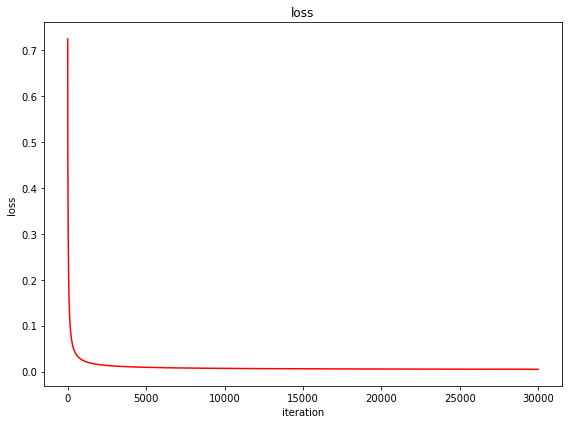

In [16]:
plot_loss_curve(loss1_iteration)

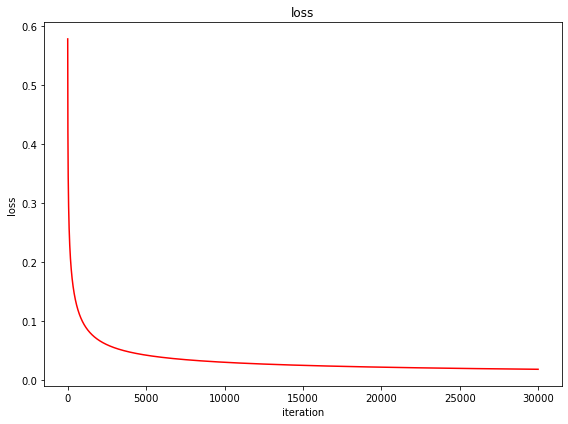

In [17]:
plot_loss_curve(loss2_iteration)

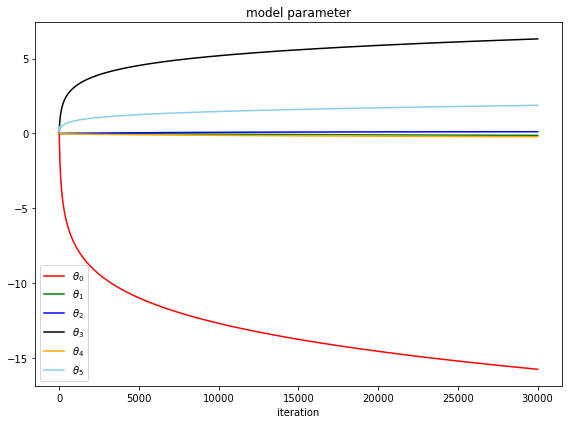

In [18]:
plot_model_parameter(theta1_iteration)

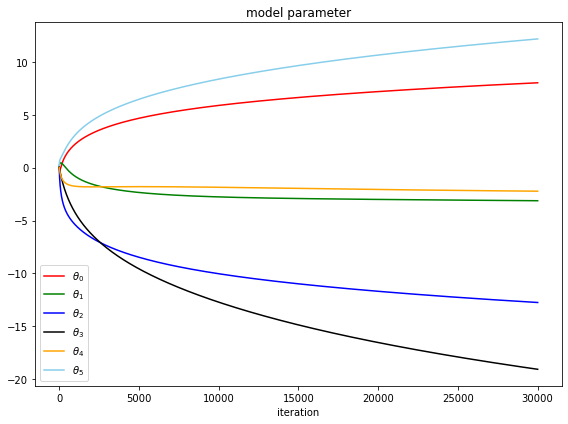

In [19]:
plot_model_parameter(theta2_iteration)

In [20]:
def plot_classifier1(data, theta):
    plt.figure(figsize=(8,8))
    xx = []
    yy = []
    xxx = []
    yyy = []
    X = np.arange(x1.min()-0.1, x1.max()+0.1, 0.05)
    Y = np.arange(y1.min()-0.1, y1.max()+0.1, 0.05)
    gX, gY = np.meshgrid(X, Y)
    Z = regression_function(theta1, feature_function1(gX, gY))
    for i in range(0, num_data1) :
        x = x1[i]
        y = y1[i]
        if label1[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label1[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    plt.plot(xx, yy, 'o',color='blue', label='Class = 0', markersize = 3)
    plt.plot(xxx, yyy, 'o',color='red', label='Class = 1', markersize = 3)
    plt.contourf(gX, gY, Z, levels=100, cmap = 'bwr')
    plt.colorbar()
    plt.contour(gX,gY, Z, levels = [0], colors = 'black')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [21]:
def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8))
    xx = []
    yy = []
    xxx = []
    yyy = []
    X = np.arange(x2.min()-0.1, x2.max()+0.1, 0.05)
    Y = np.arange(y2.min()-0.1, y2.max()+0.1, 0.05)
    gX, gY = np.meshgrid(X, Y)
    Z = regression_function(theta2, feature_function2(gX, gY))
    for i in range(0, num_data2) :
        x = x2[i]
        y = y2[i]
        if label2[i] == 0 :
            xx.append(x)
            yy.append(y)
        elif label2[i] == 1 :
            xxx.append(x)
            yyy.append(y)
    plt.plot(xx, yy, 'o',color='blue', label='Class = 0', markersize = 3)
    plt.plot(xxx, yyy, 'o',color='red', label='Class = 1', markersize = 3)
    plt.contourf(gX, gY, Z, levels=100, cmap = 'bwr')
    plt.colorbar()
    plt.contour(gX,gY, Z, levels = [0], colors = 'black')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

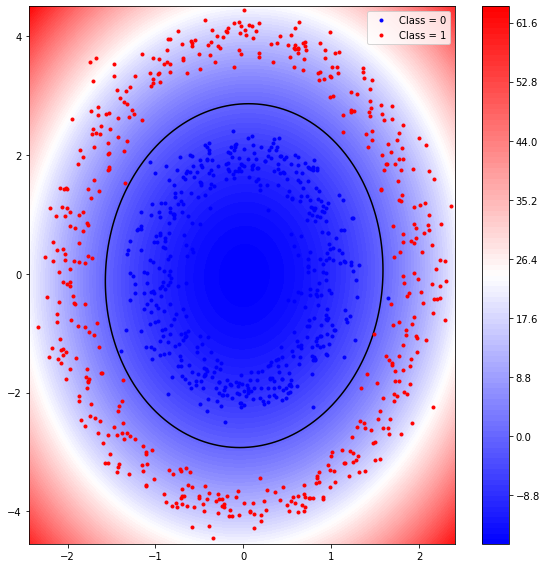

In [22]:
plot_classifier1(data1, theta1_optimal)

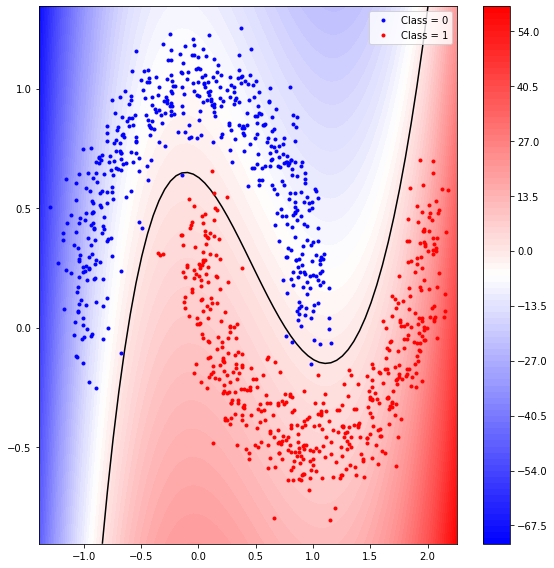

In [23]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

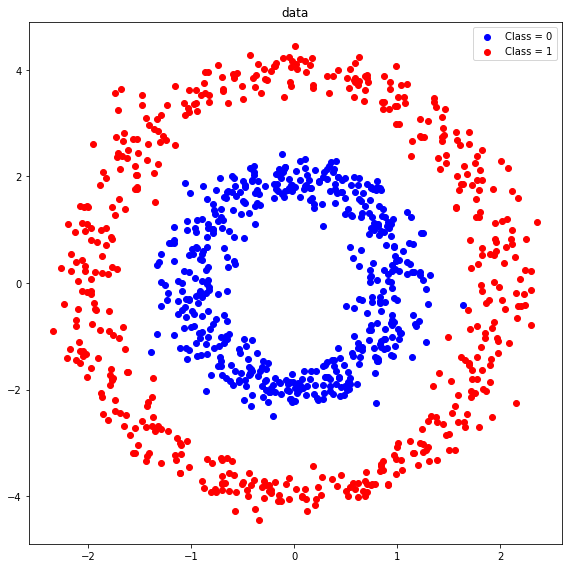

In [24]:
plot_data(x1,y1,label1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

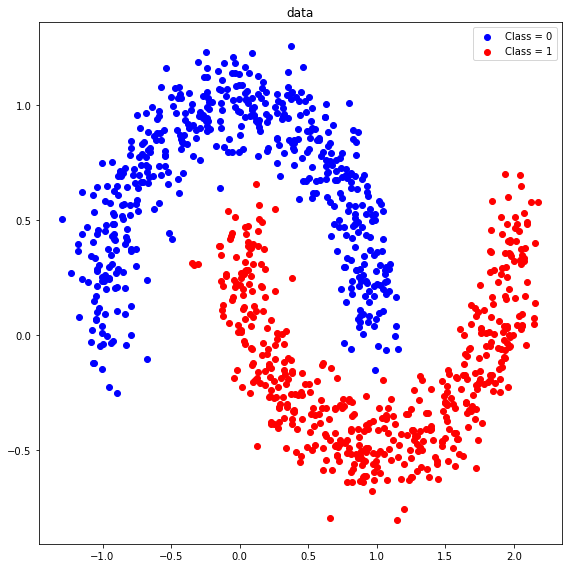

In [25]:
plot_data(x2,y2,label2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

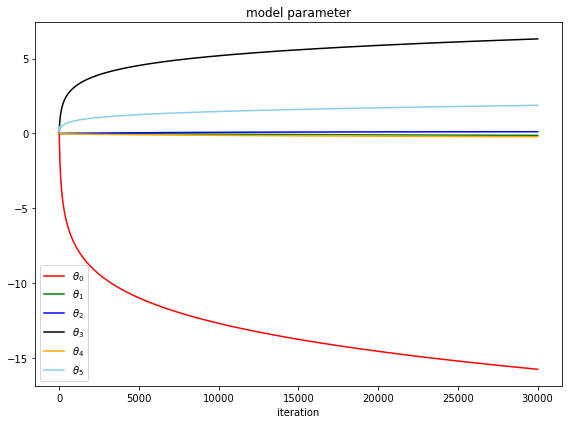

In [26]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

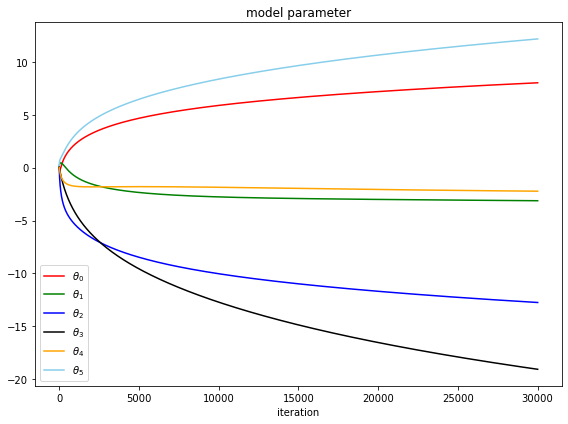

In [27]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

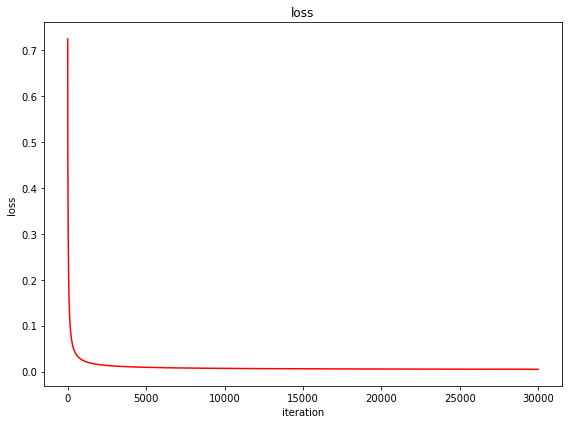

In [28]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

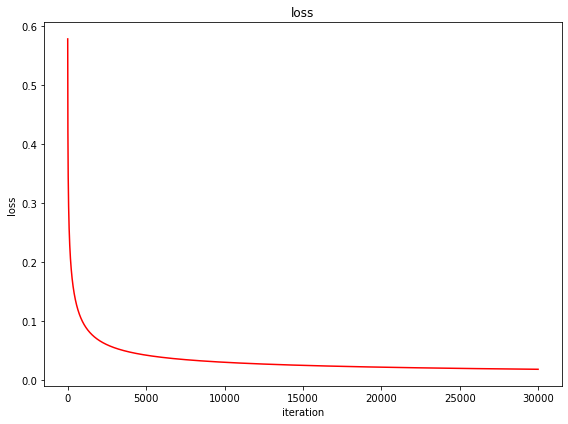

In [29]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

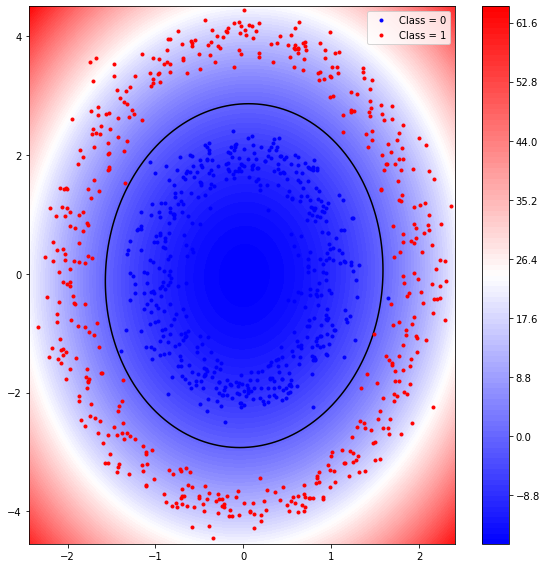

In [30]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

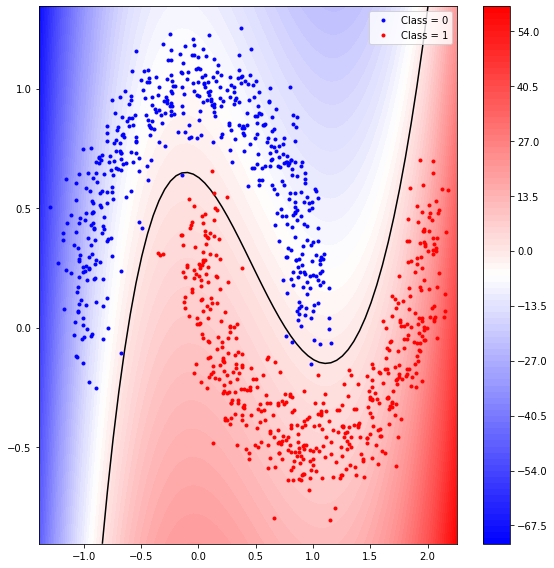

In [31]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [32]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [33]:
print(accuracy_classifier2)

0.993
